# **CP462 Project: Group 12**

## **หัวข้อ :** **TELECOM CUSTOMER CHURN PREDICTION**
---

## **คำถาม :**
1. ตัวแปรใดบ้างที่ส่งผลต่อการที่ลูกค้าจะยังคงใช้บริการต่อไป
2. ตัวแปรใดสำคัญที่สุดสำหรับการรักษาลูกค้าเดิมไว้
3. มี Missing Values หรือค่าผิดปกติหรือไม่

<div align="center">
  <img src="https://media1.tenor.com/m/w_YqR6LH_58AAAAC/mesmerizer-miku.gif" width="250">
  <div align="right">
  </div>
  <h2><b>"รู้หรือไม่ว่าการดึงดูดลูกค้าใหม่มีค่าใช้จ่ายสูงมากกว่าการรักษาลูกค้าเดิมถึง 5 เท่า?"
</b></h2>
</div>


## **สมาชิก:**
<br>1) นายจิรัฏฐ์ อู่คงคา (ID: 66102010233)
<br>2) นายญาณภัทร ปานเกษม (ID: 66102010236)
<br>3) นางสาวเบญญาภา ปลอดเอี่ยม (ID: 66102010242)
<br>4) นายรัฐศาสตร์ จันทรา (ID: 66102010244)
<br><br>

---

## **Source Dataset:**
https://www.kaggle.com/datasets/blastchar/telco-customer-churn <br>
## **Reference:**
*   https://www.kaggle.com/code/bhartiprasad17/customer-churn-prediction
*   https://peachapong-poolpol.medium.com/การทำนายค่าระดับน้ำตาลในเลือด-จากผลข้อมูลการตรวจสุขภาพ-ในเจ้าหน้าที่โรงพยาบาลแห่งหนึ่ง-โดยใช้โมเดล-29afba9a678e






## **Import Packages**

In [ ]:
import os
import numpy as np
import pandas as pd
import missingno as msno
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=FutureWarning) # ปิด FutureWarning สำหรับ Seaborn
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import StratifiedKFold

from sklearn.metrics import classification_report, ConfusionMatrixDisplay

**Connect Google Drive**

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


**Setting root directory**

In [ ]:
# ตำแหน่งปัจจุบัน
print(f"Current direcoty at {os.getcwd()}")
project_root = "/content/drive/MyDrive/CP462_Project"
os.chdir(project_root)
print(f"Current direcoty after change directory at {os.getcwd()}")

Current direcoty at /content
Current direcoty after change directory at /content/drive/MyDrive/CP462_Project


In [ ]:
os.makedirs("kaggle", exist_ok=True) # Create token folder
kaggle_dir = f"{project_root}/kaggle"
print(f"Kaggle directory: {kaggle_dir}")
os.environ["KAGGLE_CONFIG_DIR"] = kaggle_dir

Kaggle directory: /content/drive/MyDrive/CP462_Project/kaggle


## **Data Acquisition**

**Import dataset from kaggle**

In [ ]:
dataset_dir = f"{project_root}/dataset"

In [ ]:
src_dataset = "blastchar/telco-customer-churn"
!kaggle datasets download -d {src_dataset} -p {dataset_dir} --unzip

Dataset URL: https://www.kaggle.com/datasets/blastchar/telco-customer-churn
License(s): copyright-authors
  0% 0.00/172k [00:00<?, ?B/s]
100% 172k/172k [00:00<00:00, 17.7MB/s]


**ระดับการวิเคราะห์ Predictive Analytics**



In [ ]:
raw_df = pd.read_csv(f"{dataset_dir}/WA_Fn-UseC_-Telco-Customer-Churn.csv")
raw_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
print(f"Shape of dataframe is {raw_df.shape}")
print(f"Row of dataframe is {raw_df.shape[0]}")
print(f"Column of dataframe is {raw_df.shape[1]}")
print("==============================================")
print("Dataframe infomation")
print("==============================================")
raw_df.info()

Shape of dataframe is (7043, 21)
Row of dataframe is 7043
Column of dataframe is 21
Dataframe infomation
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null

### **ทำความเข้าใจข้อมูล**  

**Telco Customer Churn**
ข้อมูลชุดนี้เกี่ยวกับคาดการณ์พฤติกรรมเพื่อที่จะรักษาลูกค้า ซึ่งสามารถวิเคราะห์ข้อมูลลูกค้าที่เกี่ยวข้องทั้งหมด และพัฒนาโปรแกรมการรักษาลูกค้าที่ตรงเป้าหมาย

จากการตรวจสอบพบว่าในข้อมูลชุดนี้มี Columns ที่มีชนิดข้อมูลเป็น Float64 จำนวน 1 column, Integer64 จำนวน 2 column และนอกนั้นอีก 18 column เป็น object
สำหรับข้อมูลที่เราจะนำมาวิเคราะห์นั้นมีอยู่ด้วยกัน 21 (columns) features และ 7043 rows  
1. `customerID:` รหัสลูกค้า
2. `gender:` เพศของลูกค้า แบ่งเป็นเพศชาย (Male) และเพศหญิง (Female)
3. `SeniorCitizen:` ลูกค้าเป็นผู้สูงอายุหรือไม่ (ใช่ คือ 1 ไม่ใช่ คือ 0)
4. `Partner:` ลูกค้ามีคู่สมรสหรือไม่ (ใช่ คือ Yes ไม่ใช่คือ No)
5. `Dependents:` ลูกค้ามีบุคคลอื่นที่ต้องดูแลหรือไม่ เช่น ผู้สูงอายุหรือลูกภายในครอบครัว (มี คือ Yes ไม่มีคือ No)
6. `tenure:` จำนวนเดือนที่ลูกค้าอยู่กับบริษัท
7. `PhoneService:` ลูกค้าใช้บริการโทรศัพท์หรือไม่ (ใช่ คือ Yes ไม่ใช่คือ No)
8. `MultipleLines:` ลูกค้าใช้บริการโทรศัพท์มากกว่า 1 เบอร์โทรหรือไม่ (ใช่ คือ Yes ไม่ใช่ คือ No ไม่ใช้บริการเลย คือ No phone service)
9. `InternetService:` ลูกค้าใช้บริการ Internet ในรูปแบบใด (DSL, Fiber optic หรือไม่ใช้ คือ No)
10. `OnlineSecurity:` ลูกค้าใช้บริการความปลอดภัยออนไลน์หรือไม่ (ใช้ คือ Yes ไม่ใช้ คือ No ไม่ใช้บริการ Internet เลย คือ No internet service)
11. `OnlineBackup:` ลูกค้าใช้บริการสำรองข้อมูลออนไลน์หรือไม่ (ใช้ คือ Yes ไม่ใช้ คือ No ไม่ใช้บริการ Internet เลย คือ No internet service)
12. `DeviceProtection:` ลูกค้าใช้บริการปกป้องอุปกรณ์ (Device Protection) หรือไม่ (ใช้ คือ Yes ไม่ใช้ คือ No ไม่ใช้บริการ Internet เลย คือ No internet service)
13. `TechSupport:` ลูกค้าใช้บริการ TechSupport หรือไม่ (ใช้ คือ Yes ไม่ใช้ คือ No ไม่ใช้บริการ Internet เลย คือ No internet service)
14. `StreamingTV:` ลูกค้าใช้บริการ Streaming TV หรือไม่ (ใช้ คือ Yes ไม่ใช้ คือ No ไม่ใช้บริการ Internet เลย คือ No internet service)
15. `StreamingMovies:` ลูกค้าใช้บริการ Streaming Movies หรือไม่ (ใช้ คือ Yes ไม่ใช้ คือ No ไม่ใช้บริการ Internet เลย คือ No internet service)
16. `Contract:` ระยะเวลาสำหรับการสมัครใช้บริการของลูกค้า (รายเดือน คือ Month-to-month รายปี คือ One year และ Two year คือ 2 ปี)
17. `PaperlessBilling:` ลูกค้ามีระบบเรียกเก็บเงินโดยไม่ใช้กระดาษ (บิล) หรือไม่ (ใช่ คือ Yes ไม่ใช่ คือ No)
18. `PaymentMethod:` ลูกค้ามีรูปแบบการชำระเงินแบบใด (เช็คแบบ Electronic) คือ Electronic check เช็คทางไปรษณีย์ คือ Mailed check โอนผ่านทางธนาคาร คือ Bank transfer (ชำระอัตโนมัติ) และ ชำระทางบัตรเคดิต คือ Credit card
19. `MonthlyCharges:` ค่าใช้จ่ายที่ลูกค้าใช้บริการต่อเดือน
20. `TotalCharges:` ค่าใช้จ่ายทั้งหมดที่ลูกค้าใช้บริการตั้งแต่จนถึงปัจจุบัน
21. `Churn:` ลูกค้าจะเลิกใช้บริการหรือไม่ (ใช่ คือ Yes ไม่ใช้ คือ No)


## **Data Wrangling**

### **Gathering**

**ตรวจสอบ Duplicate ภายใน Dataset**

In [ ]:
print(f"The summation of duplicate in this dataset: {raw_df.duplicated().sum()}")

The summation of duplicate in this dataset: 0


**Visualization missing value in this dataset**

<Axes: >

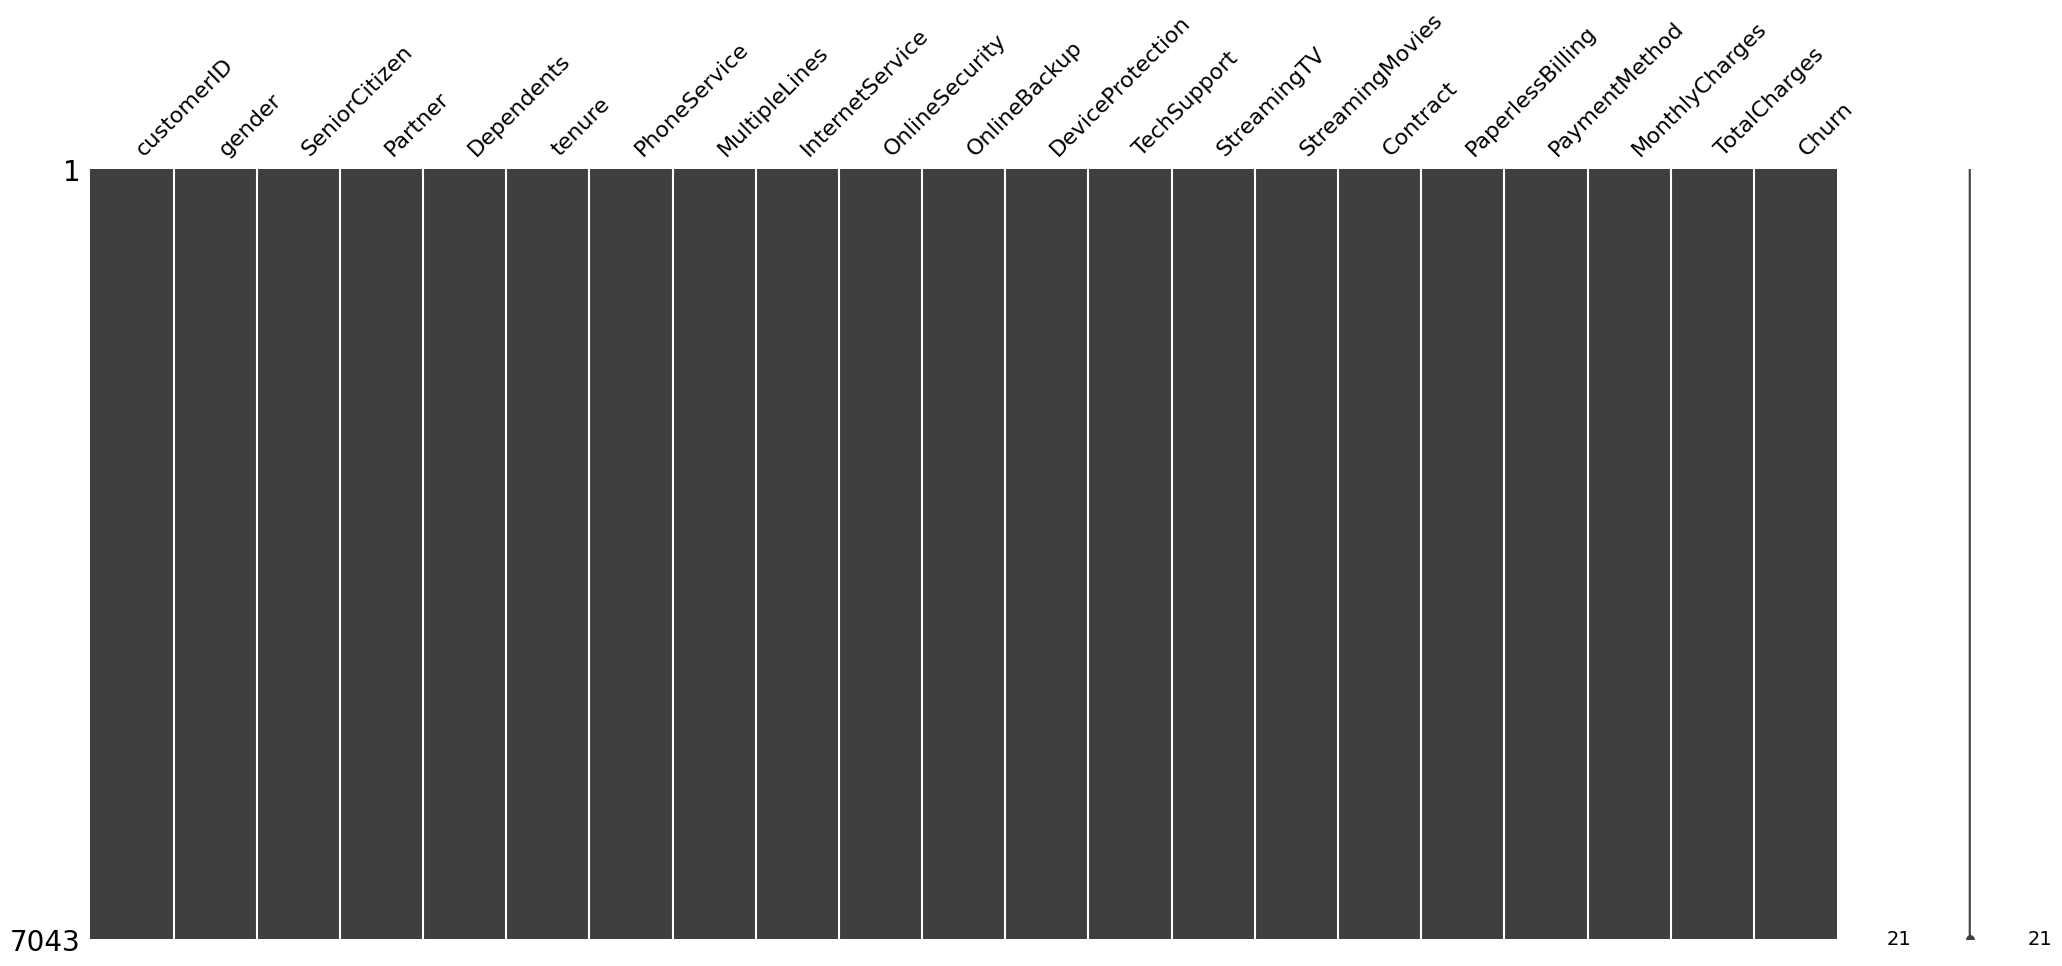

In [ ]:
msno.matrix(raw_df)

In [ ]:
print("Detail of null value in this dataset")
print("====================")
raw_df.isna().sum()

Detail of null value in this dataset


,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


จากการ Visualization ข้างต้น พบว่า Dataset ชุดนี้ไม่มี Missing Value เกิดขึ้นเลย

### **Cleanning**

**ตรวจสอบ Missing Value แบบเชิงลึก**

เดิมที Column TotalCharges เป็นข้อมูลประเภท Object เราจะทำการแปลงให้เป็น Numeric Datatype

In [ ]:
clean_df = raw_df.copy() # Copy dataframe จากต้นฉบับ

In [ ]:
clean_df["TotalCharges"] = pd.to_numeric(raw_df["TotalCharges"], errors="coerce") # แปลงข้อมูลใน Column TotalCharges ให้เป็นข้อมูลตัวเลข
print("Dataframe infomation")
print("==============================================")
clean_df.info()

Dataframe infomation
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  704

ตอนนี้ TotalCharges เป็น float64 แล้ว

In [ ]:
print("Detail of null value in this dataset")
print("====================")
clean_df.isna().sum()

Detail of null value in this dataset


,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


หลังจากที่เราพยายามแปลงข้อมูลใน Column TotalCharges ให้เป็นข้อมูล Numerical พบว่ามีข้อมูลที่เป็น Missing Value จำนวน 11 ข้อมูล จากการที่ไม่สามารถแปลงให้เป็นข้อมูลตัวเลขได้ด้วยเหตุผลบางอย่างเช่น ข้อมูลเดิมอาจจะเป็น " " ทำให้โปรแกรมมองว่านี้ไม่ใช่ค่า NaN แต่เป็นข้อมูล String แต่เมื่อจะแปลงเป็น Numerical ทำให้ไม่สามารถแปลงได้ และได้ค่า NaN แทน

In [ ]:
empty_totalcharge = raw_df.loc[raw_df["TotalCharges"] == " "]
empty_totalcharge[["customerID", "MonthlyCharges", "TotalCharges"]]

,customerID,MonthlyCharges,TotalCharges
488,4472-LVYGI,52.55,
753,3115-CZMZD,20.25,
936,5709-LVOEQ,80.85,
1082,4367-NUYAO,25.75,
1340,1371-DWPAZ,56.05,
3331,7644-OMVMY,19.85,
3826,3213-VVOLG,25.35,
4380,2520-SGTTA,20.00,
5218,2923-ARZLG,19.70,
6670,4075-WKNIU,73.35,


In [ ]:
clean_df[clean_df["TotalCharges"].isna()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [ ]:
clean_df[clean_df["TotalCharges"].isna()].index

Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')

ตรวจสอบว่าข้อมูลที่มีค่าใน Column tenure เป็น 0 มีจำนวนเท่ากับข้อมูลที่มีค่าใน Column TotalCharges เป็น NaN รวมถึงตำแหน่ง Index ว่าตรงกันหรือไม่ เพื่อป้องกันไม่ให้ลบข้อมูลเกิน

In [ ]:
clean_df[clean_df["tenure"] == 0].index

Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')

เราเลือกลบ Column ที่มีค่า tenure เป็น 0 โดยมีจำนวน 11 แถว ซึ่งสามารถลบได้โดยไม่ส่งผลต่อข้อมูลโดยรวม การที่ลูกค้ายังใช้บริการได้ไม่ถึงเดือน ทำให้ไม่สะท้อนถึงพฤติกรรมของการใช้งานจริง

In [ ]:
clean_df.drop(labels=clean_df[clean_df["tenure"] == 0].index, axis=0, inplace=True)
clean_df[clean_df["tenure"] == 0].index # ตรวจสอบอีกครั้ง

Index([], dtype='int64')

In [ ]:
# แทนค่าใน Column TotalCharges ที่เป็น NaN ด้วยค่าเฉลี่ย (Mean) ของ Column นี้
"""mean = clean_df["TotalCharges"].mean()
clean_df["TotalCharges"].fillna(mean, inplace=True)"""

'mean = clean_df["TotalCharges"].mean()\nclean_df["TotalCharges"].fillna(mean, inplace=True)'

ตรวจสอบอีกครั้ง

In [ ]:
print("Dataframe infomation")
print("==============================================")
clean_df.info()

Dataframe infomation
<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non

In [ ]:
print("Detail of null value in this dataset")
print("====================")
clean_df.isna().sum()

Detail of null value in this dataset


,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


ลบ Column ที่ไม่จำเป็นออก นั่นคือ CustomerID เนื่องจากไม่มีผลต่อการนำไปใช้ในการทำนาย

In [ ]:
clean_df = clean_df.drop(columns=["customerID"])
clean_df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


ตรวจสอบค่าผิดปกติได้แก่ Column tenure (จำนวนเดือนที่ลูกค้าอยู่กับบริษัท), MonthlyCharges (ค่าใช้จ่ายรายเดือนของลูกค้า) และ TotalCharges (ค่าใช้จ่ายตั้งแต่ใช้บริการครั้งแรกจนถึงปัจจุบันของลูกค้า) ต้องมีค่ามากกว่าหรือเท่ากับ 0 เท่านั้น

In [ ]:
print(f"Total of incorrect value in tenure column: {clean_df[clean_df["tenure"] <= 0].shape[0]}")
print(f"Total of negative value in MonthlyCharges column: {clean_df[clean_df["MonthlyCharges"] < 0].shape[0]}")
print(f"Total of negative value in TotalCharges column: {clean_df[clean_df["TotalCharges"] < 0].shape[0]}")

Total of incorrect value in tenure column: 0
Total of negative value in MonthlyCharges column: 0
Total of negative value in TotalCharges column: 0


ตรวจสอบ Column อื่น ๆ ที่ไม่ใช่ Numerical ว่ามีค่าที่เป็นไปได้กี่ค่า และตรงตามเงื่อนไขที่ควรจะเป็นหรือไม่

In [ ]:
print("Recheck ossible values in each column")
print("=====================================")
print(f"Unique values in gender column: {clean_df["gender"].unique()}")
print(f"Unique values in SeniorCitizen column: {clean_df["SeniorCitizen"].unique()}")
print(f"Unique values in Partner column: {clean_df["Partner"].unique()}")
print(f"Unique values in Dependents column: {clean_df["Dependents"].unique()}")
print(f"Unique values in PhoneService column: {clean_df["PhoneService"].unique()}")
print(f"Unique values in MultipleLines column: {clean_df["MultipleLines"].unique()}")
print(f"Unique values in InternetService column: {clean_df["InternetService"].unique()}")
print(f"Unique values in OnlineSecurity column: {clean_df["OnlineSecurity"].unique()}")
print(f"Unique values in OnlineBackup column: {clean_df["OnlineBackup"].unique()}")
print(f"Unique values in DeviceProtection column: {clean_df["DeviceProtection"].unique()}")
print(f"Unique values in TechSupport column: {clean_df["TechSupport"].unique()}")
print(f"Unique values in StreamingTV column: {clean_df["StreamingTV"].unique()}")
print(f"Unique values in StreamingMovies column: {clean_df["StreamingMovies"].unique()}")
print(f"Unique values in Contract column: {clean_df["Contract"].unique()}")
print(f"Unique values in PaperlessBilling column: {clean_df["PaperlessBilling"].unique()}")
print(f"Unique values in PaymentMethod column: {clean_df["PaymentMethod"].unique()}")
print(f"Unique values in Churn column: {clean_df["Churn"].unique()}")

Recheck ossible values in each column
Unique values in gender column: ['Female' 'Male']
Unique values in SeniorCitizen column: [0 1]
Unique values in Partner column: ['Yes' 'No']
Unique values in Dependents column: ['No' 'Yes']
Unique values in PhoneService column: ['No' 'Yes']
Unique values in MultipleLines column: ['No phone service' 'No' 'Yes']
Unique values in InternetService column: ['DSL' 'Fiber optic' 'No']
Unique values in OnlineSecurity column: ['No' 'Yes' 'No internet service']
Unique values in OnlineBackup column: ['Yes' 'No' 'No internet service']
Unique values in DeviceProtection column: ['No' 'Yes' 'No internet service']
Unique values in TechSupport column: ['No' 'Yes' 'No internet service']
Unique values in StreamingTV column: ['No' 'Yes' 'No internet service']
Unique values in StreamingMovies column: ['No' 'Yes' 'No internet service']
Unique values in Contract column: ['Month-to-month' 'One year' 'Two year']
Unique values in PaperlessBilling column: ['Yes' 'No']
Unique 

**ตรวจสอบค่า Duplicate อีกครั้ง**

In [ ]:
print(f"The summation of duplicate in this dataset: {clean_df.duplicated().sum()}")

The summation of duplicate in this dataset: 22


In [ ]:
clean_df.drop_duplicates(inplace=True)
print(f"The summation of duplicate in this dataset: {clean_df.duplicated().sum()}")

The summation of duplicate in this dataset: 0


### **Transforming**

เพื่อการ Visualize ข้อมูล เราจะแปลงค่าใน Column SeniorCitizen ให้เป็น Yes กับ No แทนการใช้ 1 กับ 0 เพื่อความเข้าใจง่ายและเป็นไปในรูปแบบเดียวกัน

In [ ]:
clean_df["SeniorCitizen"] = clean_df["SeniorCitizen"].map({1: "Yes", 0: "No"})
clean_df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### **Enriching**

สร้าง Column เพื่อดูว่าลูกค้าใช้บริการกี่อย่าง

In [ ]:
enriched_df = clean_df.copy()
service_cols = ["PhoneService", "OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies"]
enriched_df["ServiceCount"] = enriched_df[service_cols].apply(lambda x: sum(x == "Yes"), axis=1)
enriched_df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,ServiceCount
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,3
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,3
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,3
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1


**จัดลำดับ Columns ใหม่**

In [ ]:
cols = ["ServiceCount"] + [c for c in enriched_df.columns if c not in ["ServiceCount", "Churn"]] + ["Churn"]
enriched_df = enriched_df[cols]
enriched_df.head()

,ServiceCount,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,3,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,3,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,1,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### **Validation**

In [ ]:
print("============================================Validation Part============================================")
print(f"Total of incorrect value in tenure column: {clean_df[clean_df["tenure"] <= 0].shape[0]}")
print(f"Total of negative value in MonthlyCharges column: {clean_df[clean_df["MonthlyCharges"] < 0].shape[0]}")
print(f"Total of negative value in TotalCharges column: {clean_df[clean_df["TotalCharges"] < 0].shape[0]}")
print("Recheck ossible values in each column")
print(f"Unique values in gender column: {clean_df["gender"].unique()}")
print(f"Unique value s in SeniorCitizen column: {clean_df["SeniorCitizen"].unique()}")
print(f"Unique values in Partner column: {clean_df["Partner"].unique()}")
print(f"Unique values in Dependents column: {clean_df["Dependents"].unique()}")
print(f"Unique values in PhoneService column: {clean_df["PhoneService"].unique()}")
print(f"Unique values in MultipleLines column: {clean_df["MultipleLines"].unique()}")
print(f"Unique values in InternetService column: {clean_df["InternetService"].unique()}")
print(f"Unique values in OnlineSecurity column: {clean_df["OnlineSecurity"].unique()}")
print(f"Unique values in OnlineBackup column: {clean_df["OnlineBackup"].unique()}")
print(f"Unique values in DeviceProtection column: {clean_df["DeviceProtection"].unique()}")
print(f"Unique values in TechSupport column: {clean_df["TechSupport"].unique()}")
print(f"Unique values in StreamingTV column: {clean_df["StreamingTV"].unique()}")
print(f"Unique values in StreamingMovies column: {clean_df["StreamingMovies"].unique()}")
print(f"Unique values in Contract column: {clean_df["Contract"].unique()}")
print(f"Unique values in PaperlessBilling column: {clean_df["PaperlessBilling"].unique()}")
print(f"Unique values in PaymentMethod column: {clean_df["PaymentMethod"].unique()}")
print(f"Unique values in Churn column: {clean_df["Churn"].unique()}")
print("=========================================Enriching Column===============================================")
print(f"Unique values in ServiceCount column: {enriched_df["ServiceCount"].unique()}")
print("========================================================================================================")

============================================Validation Part============================================
Total of incorrect value in tenure column: 0
Total of negative value in MonthlyCharges column: 0
Total of negative value in TotalCharges column: 0
Recheck ossible values in each column
Unique values in gender column: ['Female' 'Male']
Unique value s in SeniorCitizen column: ['No' 'Yes']
Unique values in Partner column: ['Yes' 'No']
Unique values in Dependents column: ['No' 'Yes']
Unique values in PhoneService column: ['No' 'Yes']
Unique values in MultipleLines column: ['No phone service' 'No' 'Yes']
Unique values in InternetService column: ['DSL' 'Fiber optic' 'No']
Unique values in OnlineSecurity column: ['No' 'Yes' 'No internet service']
Unique values in OnlineBackup column: ['Yes' 'No' 'No internet service']
Unique values in DeviceProtection column: ['No' 'Yes' 'No internet service']
Unique values in TechSupport column: ['No' 'Yes' 'No internet service']
Unique values in Streaming

In [ ]:
print(f"Shape of dataframe is {enriched_df.shape}")
print(f"Row of dataframe is {enriched_df.shape[0]}")
print(f"Column of dataframe is {enriched_df.shape[1]}")
print("==============================================")
print("Dataframe infomation")
print("==============================================")
enriched_df.info()
print("==============================================")
print(f"The summation of duplicate in this dataset: {enriched_df.duplicated().sum()}")

Shape of dataframe is (7010, 21)
Row of dataframe is 7010
Column of dataframe is 21
Dataframe infomation
<class 'pandas.core.frame.DataFrame'>
Index: 7010 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ServiceCount      7010 non-null   int64  
 1   gender            7010 non-null   object 
 2   SeniorCitizen     7010 non-null   object 
 3   Partner           7010 non-null   object 
 4   Dependents        7010 non-null   object 
 5   tenure            7010 non-null   int64  
 6   PhoneService      7010 non-null   object 
 7   MultipleLines     7010 non-null   object 
 8   InternetService   7010 non-null   object 
 9   OnlineSecurity    7010 non-null   object 
 10  OnlineBackup      7010 non-null   object 
 11  DeviceProtection  7010 non-null   object 
 12  TechSupport       7010 non-null   object 
 13  StreamingTV       7010 non-null   object 
 14  StreamingMovies   7010 non-null   ob

## **Explore Data Analysis**

### **Descriptive Statistics**

Numerical Data ประกอบไปด้วย `tenure`,	`MonthlyCharges`, `TotalCharges` และ `ServiceCount`

In [ ]:
numerical_cols = ["tenure", "MonthlyCharges", "TotalCharges", "ServiceCount"]
print("=====================================================")
print("Descriptive statistics of this dataframe numerical columns overall")
print("=====================================================")
enriched_df[numerical_cols].describe()

Descriptive statistics of this dataframe numerical columns overall


,tenure,MonthlyCharges,TotalCharges,ServiceCount
count,7010.000000,7010.000000,7010.000000,7010.000000
mean,32.520399,64.888666,2290.353388,2.947504
std,24.520441,30.064769,2266.820832,1.843370
min,1.000000,18.250000,18.800000,0.000000
25%,9.000000,35.750000,408.312500,1.000000
50%,29.000000,70.400000,1403.875000,3.000000
75%,56.000000,89.900000,3807.837500,4.000000
max,72.000000,118.750000,8684.800000,7.000000


### **Median, Mode, Skewness, Kurtosis**

In [ ]:
print("=============Numerical columns report overall============")
print("Median")
print("=================================================")
print(f"Median value of tenure column: {enriched_df["tenure"].median()}")
print(f"Median value of MonthlyCharges column: {enriched_df["MonthlyCharges"].median()}")
print(f"Median value of TotalCharges column: {enriched_df["TotalCharges"].median()}")
print("=================================================")
print("Mode")
print("=================================================")
print(f"Mode value of tenure column: {enriched_df["tenure"].mode()[0]}")
print(f"Mode value of MonthlyCharges column: {enriched_df["MonthlyCharges"].mode()[0]}")
print(f"Mode value of TotalCharges column: {enriched_df["TotalCharges"].mode()[0]}")
print("=================================================")
print("Skewness")
print("=================================================")
print(f"Skewness value of tenure column: {enriched_df["tenure"].skew()}")
print(f"Skewness value of MonthlyCharges column: {enriched_df["MonthlyCharges"].skew()}")
print(f"Skewness value of TotalCharges column: {enriched_df["TotalCharges"].skew()}")
print("=================================================")
print("Kurtosis")
print("=================================================")
print(f"Kurtosis value of tenure column: {enriched_df["tenure"].kurtosis()}")
print(f"Kurtosis value of MonthlyCharges column: {enriched_df["MonthlyCharges"].kurtosis()}")
print(f"Kurtosis value of TotalCharges column: {enriched_df["TotalCharges"].kurtosis()}")

=============Numerical columns report overall============
Median
Median value of tenure column: 29.0
Median value of MonthlyCharges column: 70.4
Median value of TotalCharges column: 1403.875
Mode
Mode value of tenure column: 1
Mode value of MonthlyCharges column: 20.05
Mode value of TotalCharges column: 19.75
Skewness
Skewness value of tenure column: 0.23374046380741495
Skewness value of MonthlyCharges column: -0.2256859216372038
Skewness value of TotalCharges column: 0.9583220586626408
Kurtosis
Kurtosis value of tenure column: -1.3885258552837811
Kurtosis value of MonthlyCharges column: -1.2528433550802278
Kurtosis value of TotalCharges column: -0.23837324985924724


**จากการวิเคราะห์ ค่ามัธยฐาน (Median), ค่าฐานนิยม (Mode), การเบ้ของข้อมูล (Skewness) และ ความโค้งแหลมของการกระจาย (Distribution) ของข้อมูลเชิงตัวเลขแบบภาพรวม ได้ข้อสรุปดังนี้**

* `สำหรับจำนวนเดือนที่ลูกค้าอยู่กับบริษัท (tenure)` มีค่า Median คือ 29 หมายความว่าลูกค้าจำนวนครึ่งหนึ่งอยู่น้อยกว่า 29 เดือน ในทางกลับกันก็มีอีกครึ่งหนึ่งที่อยู่มากกว่า 29 เดือน มีค่า Mode คือ 1 แสดงให้เห็นว่าลูกค้าส่วนใหญ่มีแนวโน้มเลิกใช้บริการตั้งแต่ช่วงเดือนแรก มีค่า Skewness ประมาณ 0.2337 ซึ่งเป็นการแจกแจงที่ค่อนข้างสมมาตรแต่อาจจะเอนเอียงไปทางขวาเล็กน้อย หมายถึงยังคงมีลูกค้าส่วนหนึ่งที่อยู่กับบริษัทนานกว่าค่าเฉลี่ย และมีค่า Kurtosis ประมาณ -1.3885 แสดงให้เห็นถึงการแจกแจงแบบแนวราบ ไม่มีจุดยอดสูงที่ชัดเจน หมายถึงระยะเวลาที่ลูกค้าอยู่กระจายแบบกว้าง ๆ

* `สำหรับค่าใช้จ่ายรายเดือนของลูกค้า (MonthlyCharges)`
มีค่า Median คือ 70.4 หมายความว่าลูกค้าจำนวนครึ่งหนึ่งมีค่าใช้จ่ายน้อยกว่าประมาณ 70 ดอลลาร์ต่อเดือน และอีกครึ่งหนึ่งมีค่าใช้จ่ายมากกว่านี้ โดยมีค่า Mode อยู่ที่ 20.05 ซึ่งแสดงให้เห็นว่าจำนวนลูกค้าที่จ่ายราว ๆ 20 ดอลลาร์ต่อเดือนนั้นมีจำนวนมากที่สุด มีค่า Skewness ประมาณ -0.2257 ซึ่งเป็นการเอนเอียงไปทางซ้ายเล็กน้อย หมายถึงมีลูกค้าบางส่วนที่จ่ายค่าบริการในอัตราที่ต่ำกว่าค่าเฉลี่ย และค่า Kurtosis ประมาณ -1.253 บ่งบอกว่าการกระจายของค่าใช้จ่ายรายเดือนค่อนข้างราบ ไม่มีจุดยอดที่สูงชัดเจน

* `สำหรับค่าใช้จ่ายรวมของลูกค้า (TotalCharges)`
มีค่า Median คือ 1403.87 หมายความว่าลูกค้าจำนวนครึ่งหนึ่งมียอดรวมค่าใช้จ่ายน้อยกว่าประมาณ 1404 ดอลลาร์ และอีกครึ่งหนึ่งมียอดมากกว่านี้ โดยมีค่า Mode คือ 19.75 ซึ่งมีสาเหตุมาจากว่าลูกค้าจำนวนมากเลิกใช้บริการไปตั้งแต่ช่วงต้น ทำให้ยอดรวมค่าใช้จ่ายต่ำมากโดยส่วยใหญ่ การแจกแจงมีค่า Skewness ประมาณ 0.958 ซึ่งเอนเอียงไปทางขวาค่อนข้างมาก หมายถึงยังคงมีลูกค้ากลุ่มหนึ่งที่อยู่กับบริษัทนานและมีค่าใช้จ่ายรวมสูงกว่าค่าเฉลี่ยอย่างมาก ส่วนค่า Kurtosis อยู่ที่ประมาณ -0.238 แสดงถึงการกระจายที่ค่อนข้างราบ ไม่มีการกระจุกตัวสูงตรงกลางมากนัก




### **Visualization graphs**

#### **Distribution**

##### **วิเคราะห์การกระจายของ Numerical Data โดยภาพรวม**

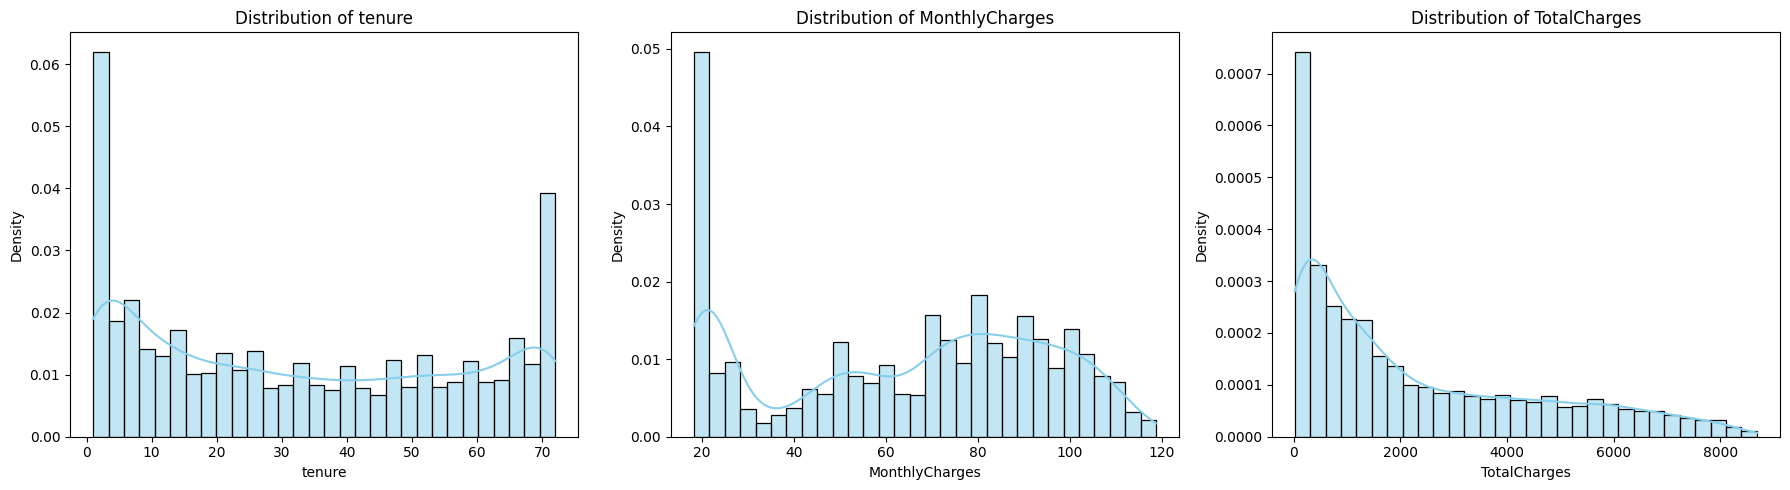

In [ ]:
plt.figure(figsize=(18, 5))

for i, col in enumerate(["tenure", "MonthlyCharges", "TotalCharges"], 1):
    plt.subplot(1, 3, i)
    sns.histplot(enriched_df[col], kde=True, bins=30, color="skyblue", stat="density")
    plt.title(f"Distribution of {col}", fontsize=12)
    plt.xlabel(col)
    plt.ylabel("Density")

plt.tight_layout()
plt.show()

**วิเคราะห์แบบภาพแยก**

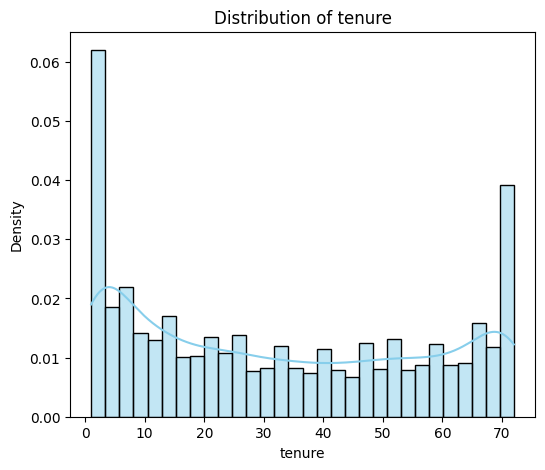

In [ ]:
plt.figure(figsize=(6, 5))
sns.histplot(enriched_df["tenure"], kde=True, bins=30, color="skyblue", stat="density")
plt.title("Distribution of tenure", fontsize=12)
plt.xlabel("tenure")
plt.ylabel("Density")
plt.show()

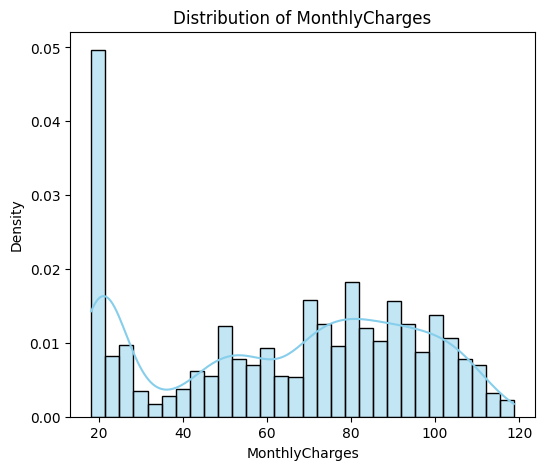

In [ ]:
plt.figure(figsize=(6, 5))
sns.histplot(enriched_df["MonthlyCharges"], kde=True, bins=30, color="skyblue", stat="density")
plt.title("Distribution of MonthlyCharges", fontsize=12)
plt.xlabel("MonthlyCharges")
plt.ylabel("Density")
plt.show()

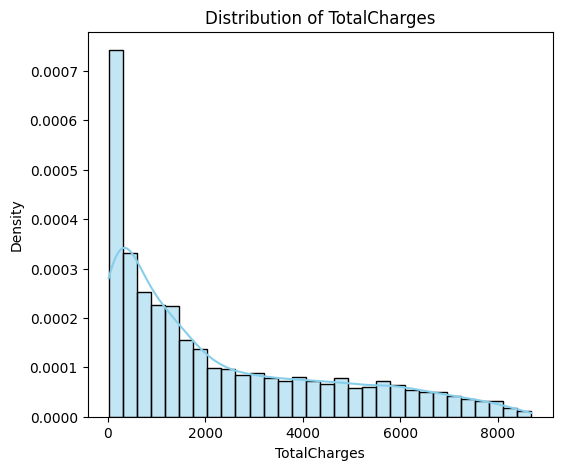

In [ ]:
plt.figure(figsize=(6, 5))
sns.histplot(enriched_df["TotalCharges"], kde=True, bins=30, color="skyblue", stat="density")
plt.title("Distribution of TotalCharges", fontsize=12)
plt.xlabel("TotalCharges")
plt.ylabel("Density")
plt.show()

##### **วิเคราะห์การกระจายของ Numerical Data โดยแยกตาม Churn**

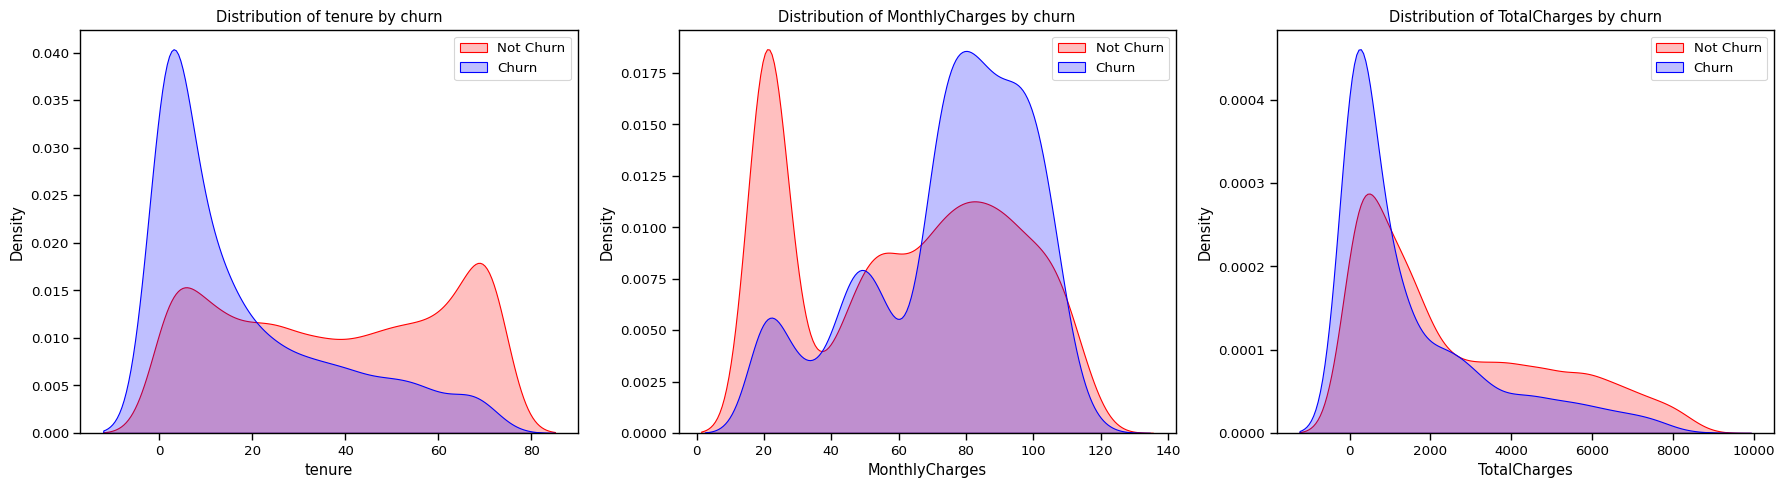

In [ ]:
sns.set_context("paper", font_scale=1.1)
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))
axes = axes.flatten()

for i, col in enumerate(["tenure", "MonthlyCharges", "TotalCharges"]):
    ax = axes[i]
    sns.kdeplot(enriched_df[col][enriched_df["Churn"] == "No"],
                color="Red", shade=True, ax=ax)
    sns.kdeplot(enriched_df[col][enriched_df["Churn"] == "Yes"],
                color="Blue", shade=True, ax=ax)

    ax.legend(["Not Churn", "Churn"], loc="upper right")
    ax.set_ylabel("Density")
    ax.set_xlabel(col)
    ax.set_title(f"Distribution of {col} by churn")

for j in range(len(numerical_cols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

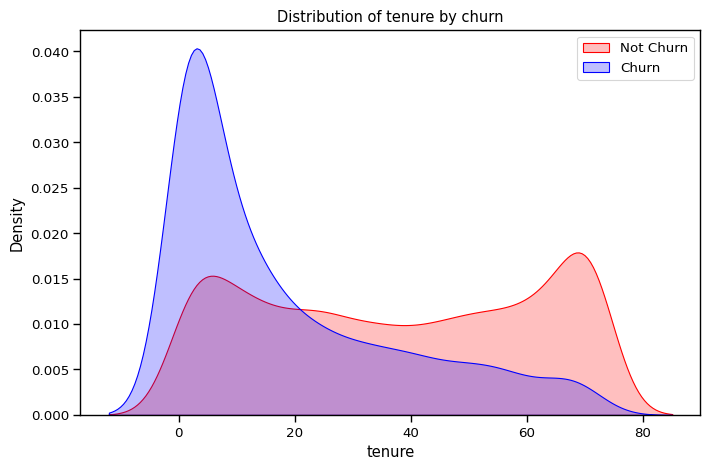

In [ ]:
plt.figure(figsize=(8, 5))
sns.kdeplot(enriched_df["tenure"][enriched_df["Churn"] == "No"],
            color="Red", shade=True)
sns.kdeplot(enriched_df["tenure"][enriched_df["Churn"] == "Yes"],
            color="Blue", shade=True)
plt.legend(["Not Churn", "Churn"], loc="upper right")
plt.title("Distribution of tenure by churn")
plt.xlabel("tenure")
plt.ylabel("Density")
plt.show()

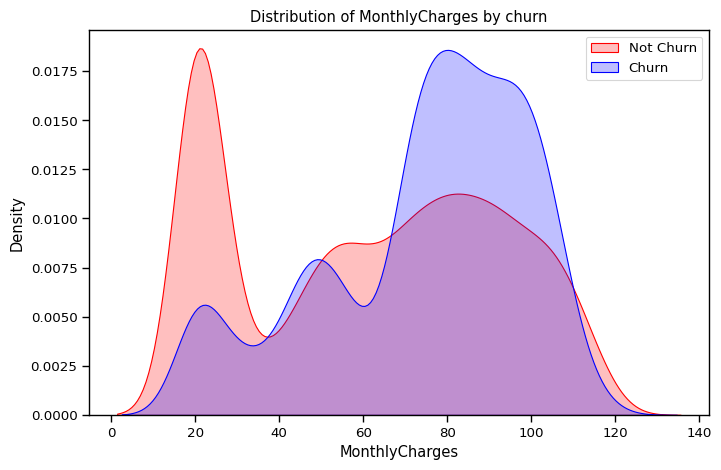

In [ ]:
plt.figure(figsize=(8, 5))
sns.kdeplot(enriched_df["MonthlyCharges"][enriched_df["Churn"] == "No"],
            color="Red", shade=True)
sns.kdeplot(enriched_df["MonthlyCharges"][enriched_df["Churn"] == "Yes"],
            color="Blue", shade=True)
plt.legend(["Not Churn", "Churn"], loc="upper right")
plt.title("Distribution of MonthlyCharges by churn")
plt.xlabel("MonthlyCharges")
plt.ylabel("Density")
plt.show()

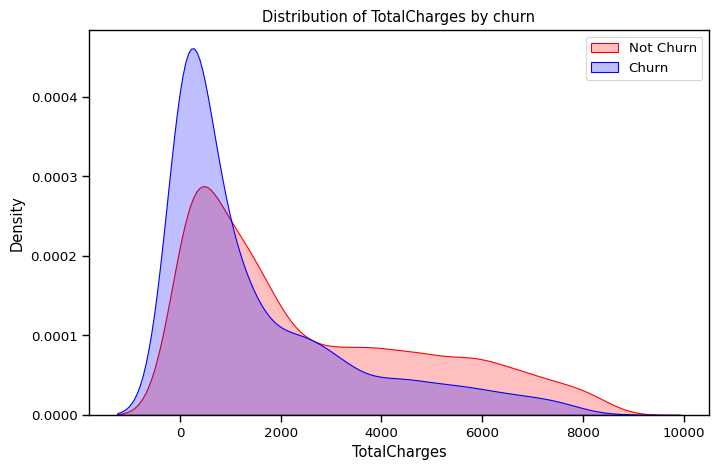

In [ ]:
plt.figure(figsize=(8, 5))
sns.kdeplot(enriched_df["TotalCharges"][enriched_df["Churn"] == "No"],
            color="Red", shade=True)
sns.kdeplot(enriched_df["TotalCharges"][enriched_df["Churn"] == "Yes"],
            color="Blue", shade=True)
plt.legend(["Not Churn", "Churn"], loc="upper right")
plt.title("Distribution of TotalCharges by churn")
plt.xlabel("TotalCharges")
plt.ylabel("Density")
plt.show()

**จากภาพกราฟการกระจายข้อมูล (Kernel Density Estimation KDE plots) ที่แยกตามกลุ่ม Churn (สีน้ำเงิน) และ Not Churn (สีแดง) สำหรับ tenure, MonthlyCharges และ TotalCharges สามารถอธิบายได้ดังนี้**

* `สำหรับจำนวนเดือนที่ลูกค้าอยู่กับบริษัท (tenure)` กราฟสีแดง (Not Churn) จะมีการกระจายตัวแบบแนวราบไม่มีจุดเด่นที่ชัดเจน ในทางกลับกันกราฟสีน้ำเงิน (Churn) มีการกระจุกตัวบริเวณทางซ้ายนั่นหมายถึงว่าลูกค้าส่วนมากมีแนวโน้มเลิกใช้บริการไปในช่วงเดือนแรก ๆ สูง

* `สำหรับค่าใช้จ่ายรายเดือนของลูกค้า (MonthlyCharges)` กราฟสีน้ำเงิน (Churn) มีแนวโน้มที่จะมีการกระจุกตัวไปทางขวามากกว่า และมีค่าสูงกว่าอย่างมากเมื่อเทียบกับกราฟสีแดง (Not Churn) แสดงให้เห็นว่าลูกค้าที่มีค่าใช้จ่ายรายเดือนสูงก็มีแนวโน้มที่จะเลิกใช้บริการมากกว่า

* `สำหรับค่าใช้จ่ายรวมของลูกค้า (TotalCharges)` กราฟสีน้ำเงิน (Churn) มีแนวโน้มการกระจุกตัวในทางซ้ายอย่างชัดเจน เช่นเดียวกับกราฟสีแดง (Not Churn) แต่จะมีความแหลมน้อยกว่า ซึ่งสอดคล้องกับ tenure เนื่องจากลูกค้าส่วนใหญ่เลิกใช้บริการในช่วงเดือนแรก ทำให้มีค่าจ่ายโดยรวมน้อยตามไป

#### **Box-Plot**

**วิเคราะห์ Box-Plot ของ Numerical Data โดยแยกตาม Churn หรือไม่ Churn**

##### **`tenure` เทียบกับ `Churn`**

In [ ]:
fig = px.box(enriched_df, x="Churn", y="tenure")

fig.update_yaxes(title_text="tenure", row=1, col=1)
fig.update_xaxes(title_text="Churn", row=1, col=1)

fig.update_layout(
    autosize=True,
    width=750,
    height=600,
    title=dict(
        text="<b>tenure vs Churn</b>",
        font=dict(size=20, family="Courier"),
        x=0.5,
        xanchor="center"
    ),
    font=dict(family="Courier", size=14)
)

fig.show()

In [ ]:
print("Count of Outlier for tenure vs Churn")
print("=====================================================")
tenure_churn_yes_q1 = enriched_df[enriched_df["Churn"] == "Yes"]["tenure"].quantile(0.25)
tenure_churn_yes_q3 = enriched_df[enriched_df["Churn"] == "Yes"]["tenure"].quantile(0.75)
tenure_churn_yes_iqr = tenure_churn_yes_q3 - tenure_churn_yes_q1
tenure_churn_yes_lower_bound = tenure_churn_yes_q1 - (1.5 * tenure_churn_yes_iqr)
tenure_churn_yes_upper_bound = tenure_churn_yes_q3 + (1.5 * tenure_churn_yes_iqr)
print(f"Lower bound: {tenure_churn_yes_lower_bound}")
print(f"Upper bound: {tenure_churn_yes_upper_bound}")
print(f"Churn Yes Lower Outlier: {enriched_df[(enriched_df["Churn"] == "Yes") & (enriched_df["tenure"] < tenure_churn_yes_lower_bound)].shape[0]}")
print(f"Churn Yes Upper Outlier: {enriched_df[(enriched_df["Churn"] == "Yes") & (enriched_df["tenure"] > tenure_churn_yes_upper_bound)].shape[0]}")
print("=====================================================")
tenure_churn_no_q1 = enriched_df[enriched_df["Churn"] == "No"]["tenure"].quantile(0.25)
tenure_churn_no_q3 = enriched_df[enriched_df["Churn"] == "No"]["tenure"].quantile(0.75)
tenure_churn_no_iqr = tenure_churn_no_q3 - tenure_churn_no_q1
tenure_churn_no_lower_bound = tenure_churn_no_q1 - (1.5 * tenure_churn_no_iqr)
tenure_churn_no_upper_bound = tenure_churn_no_q3 + (1.5 * tenure_churn_no_iqr)
print(f"Lower bound: {tenure_churn_no_lower_bound}")
print(f"Upper bound: {tenure_churn_no_upper_bound}")
print(f"Churn No Lower Outlier: {enriched_df[(enriched_df["Churn"] == "No") & (enriched_df["tenure"] < tenure_churn_no_lower_bound)].shape[0]}")
print(f"Churn No Upper Outlier: {enriched_df[(enriched_df["Churn"] == "No") & (enriched_df["tenure"] > tenure_churn_no_upper_bound)].shape[0]}")

Count of Outlier for tenure vs Churn
Lower bound: -38.5
Upper bound: 69.5
Churn Yes Lower Outlier: 0
Churn Yes Upper Outlier: 23
Lower bound: -54.0
Upper bound: 130.0
Churn No Lower Outlier: 0
Churn No Upper Outlier: 0


##### **`MonthlyCharges` เทียบกับ `Churn`**

In [ ]:
fig = px.box(enriched_df, x="Churn", y="MonthlyCharges")

fig.update_yaxes(title_text="MonthlyCharges", row=1, col=1)
fig.update_xaxes(title_text="Churn", row=1, col=1)

fig.update_layout(
    autosize=True,
    width=750,
    height=600,
    title=dict(
        text="<b>MonthlyCharges vs Churn</b>",
        font=dict(size=20, family="Courier"),
        x=0.5,
        xanchor="center"
    ),
    font=dict(family="Courier", size=14)
)

fig.show()

In [ ]:
print("Count of Outlier for MonthlyCharges vs Churn")
print("=====================================================")
monthlycharge_churn_yes_q1 = enriched_df[enriched_df["Churn"] == "Yes"]["MonthlyCharges"].quantile(0.25)
monthlycharge_churn_yes_q3 = enriched_df[enriched_df["Churn"] == "Yes"]["MonthlyCharges"].quantile(0.75)
monthlycharge_churn_yes_iqr = monthlycharge_churn_yes_q3 - monthlycharge_churn_yes_q1
monthlycharge_churn_yes_lower_bound = monthlycharge_churn_yes_q1 - (1.5 * monthlycharge_churn_yes_iqr)
monthlycharge_churn_yes_upper_bound = monthlycharge_churn_yes_q3 + (1.5 * monthlycharge_churn_yes_iqr)
print(f"Lower bound: {monthlycharge_churn_yes_lower_bound}")
print(f"Upper bound: {monthlycharge_churn_yes_upper_bound}")
print(f"Churn Yes Lower Outlier: {enriched_df[(enriched_df["Churn"] == "Yes") & (enriched_df["MonthlyCharges"] < monthlycharge_churn_yes_lower_bound)].shape[0]}")
print(f"Churn Yes Upper Outlier: {enriched_df[(enriched_df["Churn"] == "Yes") & (enriched_df["MonthlyCharges"] > monthlycharge_churn_yes_upper_bound)].shape[0]}")
print("=====================================================")
monthlycharge_churn_no_q1 = enriched_df[enriched_df["Churn"] == "No"]["MonthlyCharges"].quantile(0.25)
monthlycharge_churn_no_q3 = enriched_df[enriched_df["Churn"] == "No"]["MonthlyCharges"].quantile(0.75)
monthlycharge_churn_no_iqr = monthlycharge_churn_no_q3 - monthlycharge_churn_no_q1
monthlycharge_churn_no_lower_bound = monthlycharge_churn_no_q1 - (1.5 * monthlycharge_churn_no_iqr)
monthlycharge_churn_no_upper_bound = monthlycharge_churn_no_q3 + (1.5 * monthlycharge_churn_no_iqr)
print(f"Lower bound: {monthlycharge_churn_no_lower_bound}")
print(f"Upper bound: {monthlycharge_churn_no_upper_bound}")
print(f"Churn No Lower Outlier: {enriched_df[(enriched_df["Churn"] == "No") & (enriched_df["MonthlyCharges"] < monthlycharge_churn_no_lower_bound)].shape[0]}")
print(f"Churn No Upper Outlier: {enriched_df[(enriched_df["Churn"] == "No") & (enriched_df["MonthlyCharges"] > monthlycharge_churn_no_upper_bound)].shape[0]}")

Count of Outlier for MonthlyCharges vs Churn
Lower bound: -0.125
Upper bound: 150.875
Churn Yes Lower Outlier: 0
Churn Yes Upper Outlier: 0
Lower bound: -70.07499999999999
Upper bound: 183.725
Churn No Lower Outlier: 0
Churn No Upper Outlier: 0


##### **`TotalCharges` เทียบกับ `Churn`**

In [ ]:
fig = px.box(enriched_df, x="Churn", y="TotalCharges")

fig.update_yaxes(title_text="TotalCharges", row=1, col=1)
fig.update_xaxes(title_text="Churn", row=1, col=1)

fig.update_layout(
    autosize=True,
    width=750,
    height=600,
    title=dict(
        text="<b>TotalCharges vs Churn</b>",
        font=dict(size=20, family="Courier"),
        x=0.5,
        xanchor="center"
    ),
    font=dict(family="Courier", size=14)
)

fig.show()

In [ ]:
print("Count of Outlier for TotalCharges vs Churn")
print("=====================================================")
totalcharge_churn_yes_q1 = enriched_df[enriched_df["Churn"] == "Yes"]["TotalCharges"].quantile(0.25)
totalcharge_churn_yes_q3 = enriched_df[enriched_df["Churn"] == "Yes"]["TotalCharges"].quantile(0.75)
totalcharge_churn_yes_iqr = totalcharge_churn_yes_q3 - totalcharge_churn_yes_q1
totalcharge_churn_yes_lower_bound = totalcharge_churn_yes_q1 - (1.5 * totalcharge_churn_yes_iqr)
totalcharge_churn_yes_upper_bound = totalcharge_churn_yes_q3 + (1.5 * totalcharge_churn_yes_iqr)
print(f"Lower bound: {totalcharge_churn_yes_lower_bound}")
print(f"Upper bound: {totalcharge_churn_yes_upper_bound}")
print(f"Churn Yes Lower Outlier: {enriched_df[(enriched_df["Churn"] == "Yes") & (enriched_df["TotalCharges"] < totalcharge_churn_yes_lower_bound)].shape[0]}")
print(f"Churn Yes Upper Outlier: {enriched_df[(enriched_df["Churn"] == "Yes") & (enriched_df["TotalCharges"] > totalcharge_churn_yes_upper_bound)].shape[0]}")

print("=====================================================")
totalcharge_churn_no_q1 = enriched_df[enriched_df["Churn"] == "No"]["TotalCharges"].quantile(0.25)
totalcharge_churn_no_q3 = enriched_df[enriched_df["Churn"] == "No"]["TotalCharges"].quantile(0.75)
totalcharge_churn_no_iqr = totalcharge_churn_no_q3 - totalcharge_churn_no_q1
totalcharge_churn_no_lower_bound = totalcharge_churn_no_q1 - (1.5 * totalcharge_churn_no_iqr)
totalcharge_churn_no_upper_bound = totalcharge_churn_no_q3 + (1.5 * totalcharge_churn_no_iqr)
print(f"Lower bound: {totalcharge_churn_no_lower_bound}")
print(f"Upper bound: {totalcharge_churn_no_upper_bound}")
print(f"Churn No Lower Outlier: {enriched_df[(enriched_df["Churn"] == "No") & (enriched_df["TotalCharges"] < totalcharge_churn_no_lower_bound)].shape[0]}")
print(f"Churn No Upper Outlier: {enriched_df[(enriched_df["Churn"] == "No") & (enriched_df["TotalCharges"] > totalcharge_churn_no_upper_bound)].shape[0]}")

Count of Outlier for TotalCharges vs Churn
Lower bound: -3166.05
Upper bound: 5651.95
Churn Yes Lower Outlier: 0
Churn Yes Upper Outlier: 106
Lower bound: -4942.875
Upper bound: 9789.725
Churn No Lower Outlier: 0
Churn No Upper Outlier: 0


##### **`ServiceCount` เทียบกับ `Churn`**

In [ ]:
fig = px.box(enriched_df, x="Churn", y="ServiceCount")

fig.update_yaxes(title_text="ServiceCount", row=1, col=1)
fig.update_xaxes(title_text="Churn", row=1, col=1)

fig.update_layout(
    autosize=True,
    width=750,
    height=600,
    title=dict(
        text="<b>ServiceCount vs Churn</b>",
        font=dict(size=20, family="Courier"),
        x=0.5,
        xanchor="center"
    ),
    font=dict(family="Courier", size=14)
)

fig.show()

In [ ]:
print("Count of Outlier for ServiceCount vs Churn")
print("=====================================================")
service_churn_yes_q1 = enriched_df[enriched_df["Churn"] == "Yes"]["ServiceCount"].quantile(0.25)
service_churn_yes_q3 = enriched_df[enriched_df["Churn"] == "Yes"]["ServiceCount"].quantile(0.75)
service_churn_yes_iqr = service_churn_yes_q3 - service_churn_yes_q1
service_churn_yes_lower_bound = service_churn_yes_q1 - (1.5 * service_churn_yes_iqr)
service_churn_yes_upper_bound = service_churn_yes_q3 + (1.5 * service_churn_yes_iqr)
print(f"Lower bound: {service_churn_yes_lower_bound}")
print(f"Upper bound: {service_churn_yes_upper_bound}")
print(f"Churn Yes Lower Outlier: {enriched_df[(enriched_df["Churn"] == "Yes") & (enriched_df["ServiceCount"] < service_churn_yes_lower_bound)].shape[0]}")
print(f"Churn Yes Upper Outlier: {enriched_df[(enriched_df["Churn"] == "Yes") & (enriched_df["ServiceCount"] > service_churn_yes_upper_bound)].shape[0]}")
print("=====================================================")
service_churn_no_q1 = enriched_df[enriched_df["Churn"] == "No"]["ServiceCount"].quantile(0.25)
service_churn_no_q3 = enriched_df[enriched_df["Churn"] == "No"]["ServiceCount"].quantile(0.75)
service_churn_no_iqr = service_churn_no_q3 - service_churn_no_q1
service_churn_no_lower_bound = service_churn_no_q1 - (1.5 * service_churn_no_iqr)
service_churn_no_upper_bound = service_churn_no_q3 + (1.5 * service_churn_no_iqr)
print(f"Lower bound: {service_churn_no_lower_bound}")
print(f"Upper bound: {service_churn_no_upper_bound}")
print(f"Churn No Lower Outlier: {enriched_df[(enriched_df["Churn"] == "No") & (enriched_df["ServiceCount"] < service_churn_no_lower_bound)].shape[0]}")
print(f"Churn No Upper Outlier: {enriched_df[(enriched_df["Churn"] == "No") & (enriched_df["ServiceCount"] > service_churn_no_upper_bound)].shape[0]}")
print("=====================================================")

Count of Outlier for ServiceCount vs Churn
Lower bound: -3.5
Upper bound: 8.5
Churn Yes Lower Outlier: 0
Churn Yes Upper Outlier: 0
Lower bound: -5.0
Upper bound: 11.0
Churn No Lower Outlier: 0
Churn No Upper Outlier: 0


#### **Pie-Chart**

##### **วิเคราะห์การ `Churn` ของลูกค้าและเพศโดยภาพรวม**

In [ ]:
print("Customer churn detail:")
print("=====================================================")
print(f"Customer Churn Yes Overall: {enriched_df[enriched_df["Churn"] == "Yes"].shape[0]}")
print(f"Customer Churn No Overall: {enriched_df[enriched_df["Churn"] == "No"].shape[0]}")

Customer churn detail:
Customer Churn Yes Overall: 1857
Customer Churn No Overall: 5153


In [ ]:
print("Customer gender detail:")
print("=====================================================")
print(f"Customer Churn Male Overall: {enriched_df[enriched_df["gender"] == "Male"].shape[0]}")
print(f"Customer Churn Female Overall: {enriched_df[enriched_df["gender"] == "Female"].shape[0]}")

Customer gender detail:
Customer Churn Male Overall: 3535
Customer Churn Female Overall: 3475


In [ ]:
# กำหนด Labels
g_counts = enriched_df["gender"].value_counts()
c_counts = enriched_df["Churn"].value_counts()

fig = make_subplots(rows=1, cols=2, specs=[[{"type":"domain"}, {"type":"domain"}]])

# Donut สำหรับ Gender
fig.add_trace(go.Pie(
    labels=g_counts.index,
    values=g_counts.values,
    name="Gender",
    hole=0.4,
    hoverinfo="label+percent+name",
    textfont_size=16
), 1, 1)

# Donut สำหรับ Churn
fig.add_trace(go.Pie(
    labels=c_counts.index,
    values=c_counts.values,
    name="Churn",
    hole=0.4,
    hoverinfo="label+percent+name",
    textfont_size=16
), 1, 2)

fig.update_layout(
    title_text="Gender and Churn Distributions",
    annotations=[
        dict(text="Gender", x=0.19, y=0.5, font_size=20, showarrow=False),
        dict(text="Churn", x=0.81, y=0.5, font_size=20, showarrow=False)
    ]
)

fig.show()

**ข้อสรุปข้อมูลการ Churn โดยแยกตามเพศ และแยกตาม Churn โดยภาพรวม**

*   ข้อมูลจำนวนคนทั้งหมด 7010 คน (หลังจาก Cleaning)
*   ข้อมูล Churn โดยแยกตามเพศ แบ่งเป็นเพศชายจำนวน 3535 คน คิดเป็น (50.4%) และเพศหญิงจำนวน 3475 คน คิดเป็น (49.6%)
*   ข้อมูล Churn โดยแยก Churn และไม่ Churn แบ่งเป็น Churn 1857 คน คิดเป็น (26.5%) และไม่ Churn 5153 คน คิดเป็น (73.5%)

สามารถสรุปได้ว่า ข้อมูลเพศค่อนข้างสมดุล และอัตราของคนที่เลิกใช้บริการค่อนข้างต่ำ แสดงให้เห็นว่าลูกค้าส่วนใหญ่ยังคงใช้บริการอยู่

##### **วิเคราะห์การ `Churn` ลูกค้าและตามเพศโดยละเอียด**

In [ ]:
print("Gender vs Churn")
print("=====================================================")
print(f"Mele Churn Yes: {enriched_df[(enriched_df["Churn"] == "Yes") & (enriched_df["gender"] == "Male")].shape[0]}")
print(f"Male Churn No: {enriched_df[(enriched_df["Churn"] == "No") & (enriched_df["gender"] == "Male")].shape[0]}")
print("=====================================================")
print(f"Female Churn Yes: {enriched_df[(enriched_df["Churn"] == "Yes") & (enriched_df["gender"] == "Female")].shape[0]}")
print(f"Female Churn No: {enriched_df[(enriched_df["Churn"] == "No") & (enriched_df["gender"] == "Female")].shape[0]}")

Gender vs Churn
Mele Churn Yes: 923
Male Churn No: 2612
Female Churn Yes: 934
Female Churn No: 2541


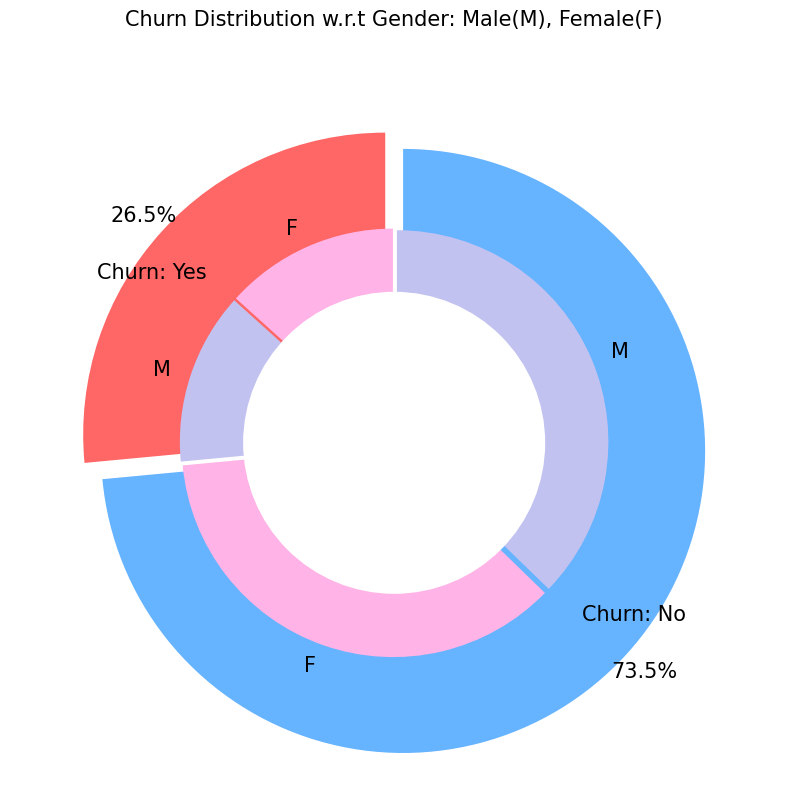

In [ ]:
plt.figure(figsize=(8, 8))
labels_churn = ["Churn: Yes", "Churn: No"]
values_churn = [enriched_df[enriched_df["Churn"] == "Yes"].shape[0], enriched_df[enriched_df["Churn"] == "No"].shape[0]]

labels_gender = ["F", "M", "F", "M"]
values_gender = [enriched_df[(enriched_df["Churn"] == "Yes") & (enriched_df["gender"] == "Female")].shape[0],
                 enriched_df[(enriched_df["Churn"] == "Yes") & (enriched_df["gender"] == "Male")].shape[0],
                 enriched_df[(enriched_df["Churn"] == "No") & (enriched_df["gender"] == "Female")].shape[0],
                 enriched_df[(enriched_df["Churn"] == "No") & (enriched_df["gender"] == "Male")].shape[0]]

colors_churn = ["#ff6666", "#66b3ff"]
colors_gender = ["#ffb3e6","#c2c2f0", "#ffb3e6","#c2c2f0"]

explode_churn = (0.4, 0.4) # ความกว้างของวงกลมสีแดงนอกสุด
explode_gender = (0.1, 0.1, 0.1, 0.1) # ความกว้างของวงกลมข้างใน สีชมพูและสีเทา
textprops = {"fontsize": 15}

plt.pie(values_churn,
        labels=labels_churn,
        autopct="%1.1f%%",
        pctdistance=1.08,
        labeldistance=0.8,
        colors=colors_churn,
        startangle=90,
        frame=True,
        explode=explode_churn,
        radius=10,
        textprops=textprops,
        counterclock=True)

plt.pie(values_gender,
        labels=labels_gender,
        colors=colors_gender,
        startangle=90,
        explode=explode_gender,
        radius=7,
        textprops=textprops,
        counterclock=True)

centre_circle = plt.Circle((0, 0), 5.0, fc="white", color="black", linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title("Churn Distribution w.r.t Gender: Male(M), Female(F)", fontsize=15, y=1.1)

plt.axis("equal")
plt.tight_layout()
plt.show()

**ข้อสรุปข้อมูลการ Churn โดยแยกตามเพศ และแยกตาม Churn โดยละเอียด**

*   ในลูกค้าที่เป็นเพศชายจำนวน 3535 คน แบ่งเป็น Churn จำนวน 923 คน ไม่ Churn 2612 คน
*   ในลูกค้าที่เป็นเพศหญิงจำนวน 3475 คน แบ่งเป็น Churn จำนวน 934 คน ไม่ Churn 2541 คน

แสดงให้เห็นว่าเพศไม่ใช่ปัจจัยหลักที่จะทำให้เกิดการ Churn ลูกค้า เนื่องจากสัดส่วนการ Churn ของทั้งเพศชายและเพศหญิงอยู่ในจำนวนที่ใกล้เคียงกัน



##### **วิเคราะห์วิธีการชำระเงิน ของลูกค้าแต่ละคนโดยภาพรวม**

In [ ]:
labels = enriched_df["PaymentMethod"].unique()
values = enriched_df["PaymentMethod"].value_counts()

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.update_layout(title_text="<b>Payment Method Distribution</b>")
fig.show()

#### **Bar Chart**

##### **วิเคราะห์ระยะเวลาสำหรับการสมัครใช้บริการของลูกค้าโดยแยกตาม `Churn`**

In [ ]:
fig = px.histogram(enriched_df, x="Churn", color="Contract", barmode="group", title="<b>Customer contract distribution<b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

**ข้อสรุปการวิเคราะห์ระยะเวลาสำหรับการสมัครใช้บริการของลูกค้าโดยแยกตาม Churn**

* ลูกค้าที่สมัครแพ็กเกจรายเดือนมีแนวโน้มสูงที่จะเลิกใช้บริการเนื่องจากลูกค้ารายเดือนสามารถยกเลิกบริการได้ง่ายและไม่มีข้อผูกมัดในระยะยาว แสดงว่าการซื้อเพ็กเกจแบบระยะสั้นอาจจะยังไม่สร้างความภักดีต่อบริษัทได้มากพอ

* ลูกค้าที่สมัครแพ็กเกจรายปีหรือ 2 ปี มีแนวโน้มต่ำมาก ๆ ที่จะเลิกใช้บริการ
แสดงว่าการเสนอแพ็กเกจระยะยาว มีโอกาสสูงมากที่จะรักษาลูกค้าเดิมให้ใช้บริการเราต่อไปได้

##### **วิเคราะห์วิธีการชำระเงินของลูกค้าโดยแยกตาม `Churn`**

In [ ]:
fig = px.histogram(enriched_df, x="Churn", color="PaymentMethod", title="<b>Customer Payment Method distribution w.r.t. Churn<b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

**ข้อสรุปการวิเคราะห์วิธีการชำระเงินของลูกค้าโดยแยกตาม Churn**


*   ลูกค้าที่ใช้วิธีการชำระเงินแบบ Electronic Check มีแนวโน้มสูงมากที่จะเลิกใช้บริการ รองลงมาคือ Mailed Check และในขณะที่ลูกค้าที่ใช้วิธีการชำระเงินแบบ Bank transfer และ Credit Card มีแนวโน้มต่ำกว่าที่จะเลิกใช้บริการ แสดงให้เห็นว่าการชำระเงินแบบ Bank transfer และ Credit Card ที่เป็นการหักเงินแบบอัตโนมัติ ได้ผลดีกว่าในแง่ของการรักษาลูกค้าเดิมเอาไว้

##### **วิเคราะห์ Internet Service ของลูกค้าโดยแยกตาม `Churn` และเพศ**

In [ ]:
print("Count of InternetService Group by Churn and Gender")
print("=====================================================")
print("Male")
print("=====================================================")
enriched_df[enriched_df["gender"] == "Male"][["InternetService", "Churn"]].value_counts()

Count of InternetService Group by Churn and Gender
Male


,,count
InternetService,Churn,
DSL,No,992
Fiber optic,No,910
No,No,710
Fiber optic,Yes,631
DSL,Yes,238
No,Yes,54


In [ ]:
print("Count of InternetService Group by Churn and Gender")
print("=====================================================")
print("Female")
print("=====================================================")
enriched_df[enriched_df["gender"] == "Female"][["InternetService", "Churn"]].value_counts()

Count of InternetService Group by Churn and Gender
Female


,,count
InternetService,Churn,
DSL,No,965
Fiber optic,No,889
No,No,687
Fiber optic,Yes,660
DSL,Yes,219
No,Yes,55


In [ ]:
fig = go.Figure()

fig.add_trace(
    go.Bar(
        x = [["Churn:No", "Churn:No", "Churn:Yes", "Churn:Yes"],
              ["Female", "Male", "Female", "Male"]],
        y = [965, 992, 219, 238],
        name = "DSL"
    )
)

fig.add_trace(
    go.Bar(
        x = [["Churn:No", "Churn:No", "Churn:Yes", "Churn:Yes"],
              ["Female", "Male", "Female", "Male"]],
        y = [889, 910, 660, 631],
        name = "Fiber optic"
    )
)

fig.add_trace(
    go.Bar(
        x = [["Churn:No", "Churn:No", "Churn:Yes", "Churn:Yes"],
              ["Female", "Male", "Female", "Male"]],
        y = [687, 710, 55, 54],
        name = "No Internet"
    )
)

fig.update_layout(
    title_text="<b>Internet Service Distribution w.r.t. Churn and Gender</b>")
fig.show()

**ข้อสรุปการวิเคราะห์ Internet Service ของลูกค้าโดยแยกตาม Churn และเพศ**

* ทั้งเพศชายและเพศหญิงมีสัดส่วนการใช้บริการ Internet Service สำหรับ DSL และ Fiber Optic หรือไม่ใช้บริการเลย ในอัตราส่วนที่ใกล้เคียงกัน

* สำหรับลูกค้าที่ใช้บริการ Internet Service แบบ Fiber Optic มีแนวโน้มสูงมากที่จะเลิกใช้บริการ แต่ในทางกลับกันลูกค้าที่ใช้บริการ Internet Service แบบ DSL หรือไม่ใช้เลย มีแนวโน้มน้อยกว่าที่จะเลิกใช้บริการ แสดงให้เห็นว่าลูกค้าอาจจะมีความคาดหวังในเรื่องของบริการแบบ Fiber Optic แต่บริการที่ได้รับอาจจะยังไม่ตอบสนองความต้องการของลูกค้าได้มากพอ ส่งผลให้ลูกค้าส่วนใหญ่ที่ใช้ Fiber Optic เลิกใช้บริการไป

##### **วิเคราะห์ `Dependent` ของลูกค้าโดยแยกตาม `Churn`**

In [ ]:
color_map = {"Yes": "#FF97FF", "No": "#AB63FA"}
fig = px.histogram(enriched_df, x="Churn", color="Dependents", barmode="group", title="<b>Dependents distribution</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

**ข้อสรุปการวิเคราะห์ Dependent ของลูกค้าโดยแยกตาม Churn**

* ลูกค้าที่มีบุคคลอื่นที่ต้องดูแล เช่น พ่อ แม่ หรือลูก มีแนวโน้มในการเลิกใช้บริการ ค่อนข้างต่ำเมื่อเทียบกับลูกค้าที่ไม่มีบุคคลอื่นที่ต้องดูแล ซึ่งสะท้อนให้เห็นว่ากลุ่มลูกค้าที่ไม่มีบุคลลอื่นที่ต้องดูแลมีแนวโน้มที่จะเปลี่ยนไปใช้บริการของบริษัทอื่นมากกว่า และไม่ยึดติดกับบริษัทเจ้าใดเจ้าหนึ่ง

##### **วิเคราะห์ `Phone` Service ของลูกค้าโดยแยกตาม `Churn`**

In [ ]:
color_map = {"Yes": "#00CC96", "No": "#B6E880"}
fig = px.histogram(enriched_df, x="Churn", color="PhoneService", title="<b>Chrun distribution w.r.t. Phone Service</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

**ข้อสรุปการวิเคราะห์ Phone Service ของลูกค้าโดยแยกตาม Churn**

* ลูกค้าที่ใช้บริการ Phone Service มีแนวโน้มที่จะเลิกใช้บริการสูงกว่า เมื่อเทียบกับลูกค้าที่ไม่ใช้บริการ Phone Service เลย ซึ่งทำให้เห็นว่าบริการโทรศัพท์บ้านหรือโทรศัพท์เสริม อาจจะยังไม่ใช่บริการหลักที่จะทำให้ลูกค้ามีความภักดีต่อบริษัท

##### **วิเคราะห์ `Senior Citizen` ของลูกค้าโดยแยกตาม `Churn`**




In [ ]:
color_map = {"Yes": "#00CC96", "No": "#B6E880"}
fig = px.histogram(enriched_df, x="Churn", color="SeniorCitizen", title="<b>Chrun distribution w.r.t. Senior Citizen</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

**ข้อสรุปการวิเคราะห์ Senior Citizen ของลูกค้าโดยแยกตาม Churn**

* ลูกค้าที่ไม่ใช่ผู้สูงอายุมีแนวโน้มที่จะเลิกใช้บริการ สูงกว่าลูกค้าที่เป็นผู้สูงอายุ แสดงให้เห็นว่ากลุ่มลูกค้าที่เป็นผู้สูงอายุอาจจะไม่ต้องการความยุ่งยากในการเปลี่ยนบริษัทผู้ให้บริการ แต่ในทางกลับกลุ่มลูกค้าที่ไม่ใช่ผู้สูงอายุพร้อมที่จะเปลี่ยนผู้ให้บริการอยู่เสมอ อาจจะมองหาสิ่งที่คุ้มค่ามากกว่า

##### **วิเคราะห์ `Partner` ของลูกค้าโดยแยกตาม `Churn`**

In [ ]:
color_map = {"Yes": "#AB63FA", "No": "#FF97FF"}
fig = px.histogram(enriched_df, x="Churn", color="Partner", barmode="group", title="<b>Partner distribution</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

**ข้อสรุปการวิเคราะห์ Partner ของลูกค้าโดยแยกตาม Churn**

* ลูกค้าที่ยังไม่มีคู่สมรส (ยังไม่แต่งงาน) มีแนวโน้มสูงกว่าที่จะเลิกใช้บริการ เมื่อเทียบกับลูกค้าที่มีคู่สมรสแล้ว ซึ่งจะมีเหตุผลคล้ายคลึงกับกลุ่มลูกค้าที่มีบุคคลอื่นที่ต้องดูแล

##### **วิเคราะห์ `Online Security` ของลูกค้าโดยแยกตาม `Churn`**

In [ ]:
color_map = {"Yes": "#FF97FF", "No": "#AB63FA"}
fig = px.histogram(enriched_df, x="Churn", color="OnlineSecurity", barmode="group", title="<b>Online Security distribution</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

**ข้อสรุปการวิเคราะห์ Online Security ของลูกค้าโดยแยกตาม Churn**

* ลูกค้าที่ไม่ใช้บริการ Online Security มีแนวโน้มสูงที่สุดในการเลิกใช้บริการ เมื่อเทียบกับลูกค้าที่ใช้บริการ Online Security หรือไม่ใช้บริการ Internet Service เลย สะท้อนให้เห็นว่าลูกค้าที่ไม่ใช้บริการ Online Security อาจรู้สึกว่า ไม่ได้รับการปกป้องหรือดูแลจากผู้ให้บริการ ทำให้มองหาผู้ให้บริการใหม่ที่ให้ความสำคัญในด้าน Security มากกว่า แต่สำหรับลูกค้าที่ไม่ใช้บริการ Internet Service เลย กลุ่มนี้ไม่ได้มีประเด็นด้าน Online Security โดยตรง แนวโน้มในการเลิกใช้บริการ จึงต่ำเพราะไม่มี Service นี้เป็นหลักอยู่แล้ว

##### **วิเคราะห์ `Paperless Billing` ของลูกค้าโดยแยกตาม `Churn`**

In [ ]:
color_map = {"Yes": "#FF97FF", "No": "#AB63FA"}
fig = px.histogram(enriched_df, x="Churn", color="PaperlessBilling", barmode="group", title="<b>Paperless Billing distribution</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

**ข้อสรุปการวิเคราะห์ Paperless Billing ของลูกค้าโดยแยกตาม Churn**

* ลูกค้าที่ชำระเงินแบบไม่ออกบิลมีแนวโน้มสูงกว่าที่จะเลิกใช้บริการเมื่อเทียบกับลูกค้าที่ชำระเงินแบบออกบิล

##### **วิเคราะห์บริการ `TechSupport` ของลูกค้าโดยแยกตาม `Churn`**

In [ ]:
fig = px.histogram(enriched_df, x="Churn", color="TechSupport", barmode="group", title="<b>TechSupport distribution</b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

**ข้อสรุปการวิเคราะห์บริการ TechSupport ของลูกค้าโดยแยกตาม Churn**

* ลูกค้าที่ไม่ใช้บริการ Tech Support มีแนวโน้มสูงที่สุดที่จะเลิกใช้บริการ เมื่อเทียบกับลูกค้าที่ใช้บริการ Tech Support หรือไม่ใช้บริการ Internet Service เลย

##### **วิเคราะห์ `SeviceCount` ของลูกค้าโดยแยกตาม `Churn`**

In [ ]:
color_map = {"Yes": "#FF97FF", "No": "#AB63FA"}
fig = px.histogram(enriched_df, x="ServiceCount", color="Churn", barmode="group", title="<b>Service Count vs Churn distribution</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

**ข้อสรุปการวิเคราะห์ ServiceCount ของลูกค้าโดยแยกตาม Churn**

* ลูกค้าที่ใช้บริการต่าง ๆ ของบริษัทตั้งแต่ 5 บริการขึ้นไปมีแนวโน้มในการเลิกใช้บริการต่ำมาก ๆ

### **Correlation Matrix**

In [ ]:
final_df = enriched_df.copy()
final_df.head()

,ServiceCount,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,3,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,3,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,1,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
def object_to_int(df):
    if df.dtypes == "object":
        df = LabelEncoder().fit_transform(df)
    return df

In [ ]:
final_df = final_df.apply(object_to_int)
final_df.head()

,ServiceCount,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,29.85,0
1,3,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1889.50,0
2,3,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,108.15,1
3,3,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42.30,1840.75,0
4,1,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,151.65,1


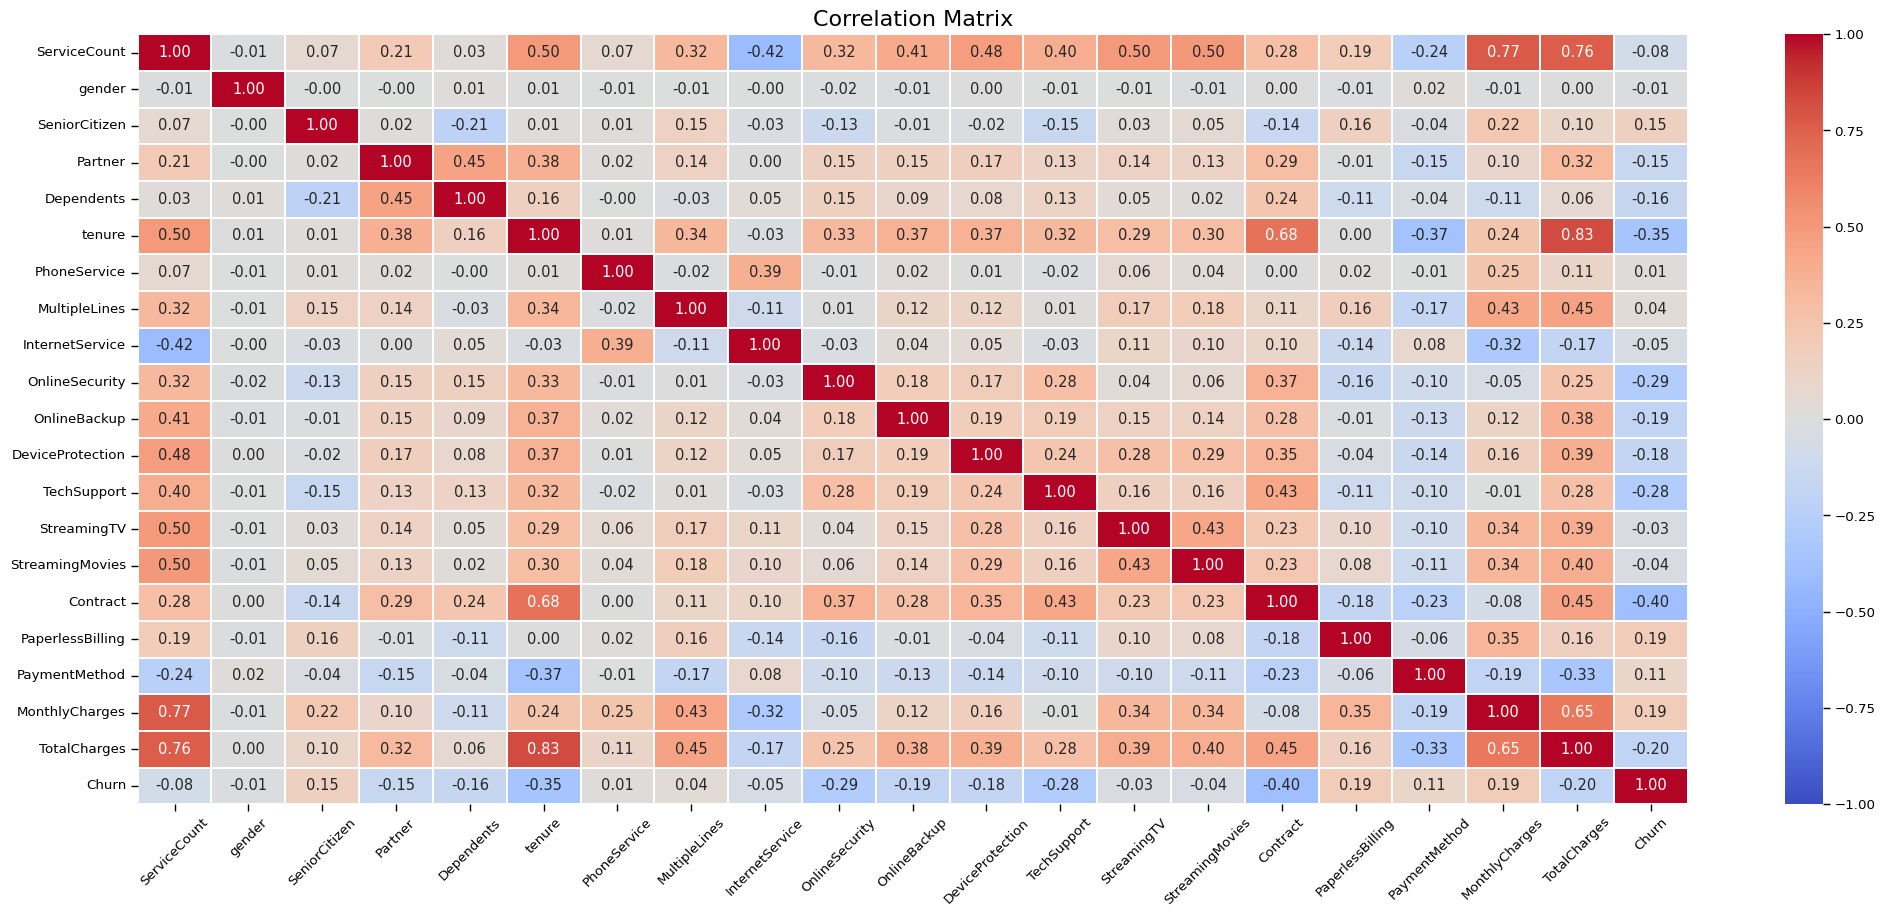

In [ ]:
plt.figure(figsize=(25, 10))
plt.title("Correlation Matrix", fontsize=16)
corr = final_df.corr()

ax = sns.heatmap(
    corr,
    xticklabels=corr.columns,
    yticklabels=corr.columns,
    annot=True,
    linewidths=.2,
    cmap="coolwarm",
    vmin=-1, vmax=1,
    fmt=".2f"
)

plt.xticks(rotation=45)
plt.show()

In [ ]:
corr_with_churn = corr["Churn"]
corr_with_churn = corr_with_churn.sort_values(ascending=False).round(2)

print("Correlation variable for Churn")
print("=====================================================")
print(corr_with_churn)

Correlation variable for Churn
Churn               1.00
MonthlyCharges      0.19
PaperlessBilling    0.19
SeniorCitizen       0.15
PaymentMethod       0.11
MultipleLines       0.04
PhoneService        0.01
gender             -0.01
StreamingTV        -0.03
StreamingMovies    -0.04
InternetService    -0.05
ServiceCount       -0.08
Partner            -0.15
Dependents         -0.16
DeviceProtection   -0.18
OnlineBackup       -0.19
TotalCharges       -0.20
TechSupport        -0.28
OnlineSecurity     -0.29
tenure             -0.35
Contract           -0.40
Name: Churn, dtype: float64


In [ ]:
complete_df = enriched_df
complete_df.to_csv(f"{dataset_dir}/data_complete.csv", index=False)

#complete_df_one_hot = final_df
#complete_df_one_hot.to_csv(f"{dataset_dir}/data_for_model.csv", index=False)

## **Summary project progress**

ชุดข้อมูลนี้เกี่ยวข้องกับการคาดการณ์การเลิกใช้บริการ (Churn) ของลูกค้าบริษัทโทรคมนาคม โดยมีเป้าหมายเพื่อทำความเข้าใจปัจจัยที่ส่งผลต่อการตัดสินใจเลิกใช้บริการของลูกค้า และนำไปสู่การพัฒนาโปรแกรมเพื่อรักษาฐานลูกค้าเดิมเอาไว้ แทนที่จะดึงดูดลูกค้าใหม่เข้ามา เนื่องจากต้องใช้งบประมาณมากกว่า

**คุณภาพของข้อมูล (Data Quality Check)**
*   ข้อมูลเริ่มต้นมี 7043 แถว และ 21 คอลัมน์
*   พบค่าที่หายไป `(Missing Values)` จำนวน 11 ค่าในคอลัมน์ `TotalCharges` ซึ่งเกิดจากข้อมูลเดิมเป็นช่องว่าง (" ") เมื่อทำการแปลงเป็นตัวเลขจึงกลายเป็น `NaN`
*   พบข้อมูลซ้ำซ้อน `(Duplicates)` จำนวน 22 แถว หลังจากการลบคอลัมน์ `CustomerID` ออก
*   ค่าว่างใน `TotalCharges` และแถวที่มีค่า `tenure` เป็น 0 มี Index ที่ตรงกัน ซึ่งบ่งชี้ว่าเป็นลูกค้าที่เพิ่งเริ่มใช้บริการและยังไม่มีค่าใช้จ่ายรวม เราจึงเลือกลบข้อมูลเหล่านี้ออก เนื่องจากยังไม่สะท้อนให้เห็นถึงการใช้บริการจริงจากลูกค้า
*   ไม่มีค่าผิดปกติ (Outliers) ที่เป็นค่าลบในคอลัมน์ตัวเลข `tenure` ซึ่งสำหรับคอลัมน์ `MonthlyCharges` และ `TotalCharges` เป็นค่าที่เกิดขึ้นจริงและสะท้อนให้เห็นว่าลูกค้ามีค่าใช้จ่ายรายเดือนและโดยรวมสูง เราจะจึงไม่ดำเนินการอะไรกับค่าเหล่านี้
*   ค่าที่เป็นไปได้ในคอลัมน์ประเภท Object เป็นไปตามที่คาดการณ์ไว้

**การจัดการคุณภาพข้อมูล:**
*   ลบ 11 แถวที่มี `tenure` เป็น 0 ซึ่งส่งผลให้ค่าว่างใน `TotalCharges` หายไปด้วย
*   ลบคอลัมน์ `customerID` เนื่องจากไม่มีผลต่อการทำนาย
*   ลบ 22 แถวที่เป็นข้อมูลซ้ำซ้อน
*   แปลงค่าในคอลัมน์ `SeniorCitizen` จาก 0/1 เป็น No/Yes เพื่อความเข้าใจง่าย
*   สร้างคอลัมน์ใหม่ `ServiceCount` เพื่อนับจำนวนบริการที่ลูกค้าแต่ละคนใช้

**หลังจากการจัดการคุณภาพข้อมูล:**
*   ข้อมูลที่ใช้ในการวิเคราะห์มี 7010 แถว และ 21 คอลัมน์
*   ไม่มี Missing Values หรือ Duplicates เหลืออยู่อีกต่อไป

**ข้อมูลพื้นฐาน (Descriptive Summary)**
*   **จำนวนเดือนที่ลูกค้าอยู่กับบริษัท (tenure):** ค่าเฉลี่ยประมาณ 33 เดือน (Mean = 32.5) ลูกค้าส่วนใหญ่มีแนวโน้มเลิกใช้บริการตั้งแต่ช่วงเดือนแรก (Mode = 1) การกระจายค่อนข้างสมมาตรแต่เอนขวาเล็กน้อย
*   **ค่าใช้จ่ายรายเดือน (MonthlyCharges):** ค่าเฉลี่ยประมาณ 64.9 ดอลลาร์ต่อเดือน ลูกค้าส่วนใหญ่มีค่าใช้จ่ายประมาณ 20 ดอลลาร์ต่อเดือน (Mode = 20.05) การกระจายเอนซ้ายเล็กน้อย
*   **ค่าใช้จ่ายรวม (TotalCharges):** ค่าเฉลี่ยประมาณ 2290.35 ดอลลาร์ การกระจายเอนขวาค่อนข้างมาก เนื่องจากลูกค้าส่วนใหญ่เลิกใช้บริการเร็ว ทำให้ยอดรวมค่าใช้จ่ายต่ำ
*   **จำนวนบริการที่ใช้ (ServiceCount):** ลูกค้าใช้บริการเฉลี่ยประมาณ 2.9 บริการ

**Insight สำคัญ (Key Insights)**
*   **Tenure:** ลูกค้าที่เลิกใช้บริการ (Churn) ส่วนใหญ่มักเป็นลูกค้าที่เพิ่งเริ่มใช้บริการได้ไม่นาน (tenure ต่ำ) ในขณะที่ลูกค้าที่ยังคงใช้บริการอยู่ (Not Churn) จะมี tenure ที่หลากหลายกว่า
*   **MonthlyCharges:** ลูกค้าที่มีค่าใช้จ่ายรายเดือนสูงมีแนวโน้มที่จะ Churn มากกว่า
*   **TotalCharges:** ลูกค้าที่ Churn ส่วนใหญ่มียอดค่าใช้จ่ายรวมต่ำ ซึ่งสอดคล้องกับ tenure ที่น้อย
*   **Gender:** เพศไม่มีผลต่อการ Churn อย่างมีนัยสำคัญ สัดส่วนการ Churn ของทั้งสองเพศใกล้เคียงกัน
*   **Contract:** ลูกค้าที่ใช้แพ็กเกจรายเดือนมีแนวโน้ม Churn สูงมาก ในขณะที่ลูกค้าที่ใช้แพ็กเกจรายปีหรือ 2 ปี มีแนวโน้ม Churn ต่ำมาก **(ปัจจัยสำคัญต่อการรักษาลูกค้า)**
*   **PaymentMethod:** ลูกค้าที่ชำระเงินแบบ Electronic Check มีแนวโน้ม Churn สูงที่สุด รองลงมาคือ Mailed Check การชำระแบบอัตโนมัติ (Bank transfer, Credit Card) มีแนวโน้ม Churn ต่ำกว่า **(ปัจจัยสำคัญต่อการรักษาลูกค้า)**
*   **InternetService:** ลูกค้าที่ใช้ Fiber Optic มีแนวโน้ม Churn สูงกว่าลูกค้าที่ใช้ DSL หรือไม่ใช้ Internet **(ปัจจัยสำคัญต่อการรักษาลูกค้า)**
*   **Dependents & Partner:** ลูกค้าที่มีบุคคลที่ต้องดูแล (Dependents) หรือมีคู่สมรส (Partner) มีแนวโน้ม Churn ต่ำกว่าลูกค้าที่ไม่มี **(ปัจจัยสำคัญต่อการรักษาลูกค้า)**
*   **PhoneService:** ลูกค้าที่ใช้ Phone Service มีแนวโน้ม Churn สูงกว่าลูกค้าที่ไม่ใช้
*   **SeniorCitizen:** ลูกค้าที่ไม่ใช่ผู้สูงอายุมีแนวโน้ม Churn สูงกว่าผู้สูงอายุ
*   **OnlineSecurity & TechSupport:** ลูกค้าที่ไม่ใช้บริการ Online Security และ Tech Support มีแนวโน้ม Churn สูงที่สุด **(ปัจจัยสำคัญต่อการรักษาลูกค้า)**
*   **PaperlessBilling:** ลูกค้าที่ใช้ Paperless Billing มีแนวโน้ม Churn สูงกว่า
*   **ServiceCount:** ลูกค้าที่ใช้บริการจำนวนมาก (ตั้งแต่ 5 อย่างขึ้นไป) มีแนวโน้ม Churn ต่ำมาก

**ข้อเสนอแนะ / ประเด็นที่ควรศึกษาเพิ่มเติม**
*   ควรให้ความสำคัญกับลูกค้าที่ใช้แพ็กเกจรายเดือน, ใช้ Internet แบบ Fiber Optic, ชำระเงินแบบ Electronic/Mailed Check, ไม่ใช้ Online Security/Tech Support, ไม่มี Partner/Dependents และมี tenure น้อย เนื่องจากกลุ่มเหล่านี้มีความเสี่ยงสูงที่จะ Churn
*   พิจารณาปรับปรุงคุณภาพบริการ Fiber Optic หรือสื่อสารความคาดหวังที่ถูกต้องให้ลูกค้า
*   ส่งเสริมให้ลูกค้าเปลี่ยนมาใช้แพ็กเกจระยะยาว หรือวิธีการชำระเงินแบบอัตโนมัติ
*   นำเสนอหรือเน้นย้ำความสำคัญของบริการเสริมด้าน Security และ Tech Support ให้กับลูกค้า
*   ศึกษาพฤติกรรมและความต้องการของลูกค้ากลุ่มที่ไม่มี Partner/Dependents และไม่ใช่ผู้สูงอายุเพิ่มเติม เพื่อหาแนวทางรักษาลูกค้ากลุ่มนี้
*   วิเคราะห์ความสัมพันธ์ระหว่าง MonthlyCharges และ TotalCharges กับ Churn ในเชิงลึกมากขึ้น โดยอาจแบ่งกลุ่มลูกค้าตามช่วงค่าใช้จ่าย

`ตัวแปรใดบ้างที่ส่งผลต่อการที่ลูกค้าจะยังคงใช้บริการต่อไป`

| Variable           | Correlation |
|-------------------|------------|
| MonthlyCharges     | 0.19       |
| PaperlessBilling   | 0.19       |
| SeniorCitizen      | 0.15       |
| PaymentMethod      | 0.11       |
| MultipleLines      | 0.04       |
| PhoneService       | 0.01       |
| gender             | -0.01      |
| StreamingTV        | -0.03      |
| StreamingMovies    | -0.04      |
| InternetService    | -0.05      |
| ServiceCount       | -0.08      |
| Partner            | -0.15      |
| Dependents         | -0.16      |
| DeviceProtection   | -0.18      |
| OnlineBackup       | -0.19      |
| TotalCharges       | -0.20      |
| TechSupport        | -0.28      |
| OnlineSecurity     | -0.29      |
| tenure             | -0.35      |
| Contract           | -0.40      |


`ตัวแปรใดสำคัญที่สุดสำหรับการรักษาลูกค้าเดิมไว้`

| Variable           | Correlation |
|-------------------|------------|
| MonthlyCharges     | 0.19       |
| PaperlessBilling   | 0.19       |
| SeniorCitizen      | 0.15       |
| PaymentMethod      | 0.11       |
| Partner            | -0.15      |
| Dependents         | -0.16      |
| DeviceProtection   | -0.18      |
| OnlineBackup       | -0.19      |
| TotalCharges       | -0.20      |
| TechSupport        | -0.28      |
| OnlineSecurity     | -0.29      |
| tenure             | -0.35      |
| Contract           | -0.40      |


เราเลือกตัดตัวแปรที่มีค่า `Correlation` ที่อยู่ในช่วง (-0.1, 0.1) ออกเนื่องจากตัวแปรเหล่านั้นเป็นมีค่า `Correlation` ต่ำเกินไป

## **Data pre-processing**

### **Load dataset after Explore Data Analysis process**

In [ ]:
churn_df = pd.read_csv(f"{dataset_dir}/data_complete.csv") # Dataset Original ที่ยังไม่มีการตัด Feature บางส่วนออกไป
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7010 entries, 0 to 7009
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ServiceCount      7010 non-null   int64  
 1   gender            7010 non-null   object 
 2   SeniorCitizen     7010 non-null   object 
 3   Partner           7010 non-null   object 
 4   Dependents        7010 non-null   object 
 5   tenure            7010 non-null   int64  
 6   PhoneService      7010 non-null   object 
 7   MultipleLines     7010 non-null   object 
 8   InternetService   7010 non-null   object 
 9   OnlineSecurity    7010 non-null   object 
 10  OnlineBackup      7010 non-null   object 
 11  DeviceProtection  7010 non-null   object 
 12  TechSupport       7010 non-null   object 
 13  StreamingTV       7010 non-null   object 
 14  StreamingMovies   7010 non-null   object 
 15  Contract          7010 non-null   object 
 16  PaperlessBilling  7010 non-null   object 


### **Drop unnecessary columns**

เราเลือก Drop Column ที่มีค่า Correlation ระหว่าง Target ("Churn") ในช่วง `[-0.1, 0.1]` ออกดังนี้

| Variable           | Correlation |
|-------------------|------------|
| MultipleLines      | 0.04       |
| PhoneService       | 0.01       |
| gender             | -0.01      |
| StreamingTV        | -0.03      |
| StreamingMovies    | -0.04      |
| InternetService    | -0.05      |
| ServiceCount       | -0.08      |

มีจำนวน Column ที่ต้อง Drop ทั้งสิ้น 7 Columns

In [ ]:
selected_df = churn_df.copy() # Dataset ที่มีการตัด Feature ที่ไม่สำคัญออกไปแล้ว
selected_df = selected_df.drop(columns=[
    "MultipleLines", # corr 0.04
    "PhoneService", # corr 0.01
    "gender", # corr -0.01
    "StreamingTV", # corr -0.03
    "StreamingMovies", # corr -0.04
    "InternetService", # corr -0.05
    "ServiceCount" # corr -0.08
])
selected_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7010 entries, 0 to 7009
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SeniorCitizen     7010 non-null   object 
 1   Partner           7010 non-null   object 
 2   Dependents        7010 non-null   object 
 3   tenure            7010 non-null   int64  
 4   OnlineSecurity    7010 non-null   object 
 5   OnlineBackup      7010 non-null   object 
 6   DeviceProtection  7010 non-null   object 
 7   TechSupport       7010 non-null   object 
 8   Contract          7010 non-null   object 
 9   PaperlessBilling  7010 non-null   object 
 10  PaymentMethod     7010 non-null   object 
 11  MonthlyCharges    7010 non-null   float64
 12  TotalCharges      7010 non-null   float64
 13  Churn             7010 non-null   object 
dtypes: float64(2), int64(1), object(11)
memory usage: 766.8+ KB


**คัดกรอง Column เพื่อแยกเข้าสู่กระบวนการ Preprocessing Data (ไม่รวม Target)**


In [ ]:
def categorize_object_cols(df, target_col=None, exclude_target=False):
    numeric_cols = []
    binary_cols = []
    categorical_cols = []

    for col in df.columns:
        if df[col].dtype == "object":
            if df[col].nunique() == 2:
                binary_cols.append(col)
            else:
                categorical_cols.append(col)
        else:
            numeric_cols.append(col)

    if (target_col is not None) and (exclude_target==True):
        if target_col in numeric_cols:
            numeric_cols.remove(target_col)
        elif target_col in binary_cols:
            binary_cols.remove(target_col)
        else:
            categorical_cols.remove(target_col)

    return numeric_cols, binary_cols, categorical_cols

In [ ]:
NUMERIC_COLS_ORI, BINARY_COLS_ORI, CATEGORICAL_COLS_ORI = categorize_object_cols(churn_df, target_col="Churn", exclude_target=True)
print("Column from original data description")
print("=" * 30)
print(f"Numeric original columns: {NUMERIC_COLS_ORI}")
print(f"Binary original columns: {BINARY_COLS_ORI}")
print(f"Categorical orignal columns: {CATEGORICAL_COLS_ORI}")
print(f"Total columns: {len(NUMERIC_COLS_ORI + BINARY_COLS_ORI + CATEGORICAL_COLS_ORI)} cols.")

Column from original data description
Numeric original columns: ['ServiceCount', 'tenure', 'MonthlyCharges', 'TotalCharges']
Binary original columns: ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']
Categorical orignal columns: ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod']
Total columns: 20 cols.


In [ ]:
NUMERIC_COLS_SEL, BINARY_COLS_SEL, CATEGORICAL_COLS_SEL = categorize_object_cols(selected_df, target_col="Churn", exclude_target=True)
print("Column from selected feature data description")
print("=" * 30)
print(f"Numeric selected feature columns: {NUMERIC_COLS_SEL}")
print(f"Binary selected feature columns: {BINARY_COLS_SEL}")
print(f"Categorical selected feature columns: {CATEGORICAL_COLS_SEL}")
print(f"Total columns: {len(NUMERIC_COLS_SEL + BINARY_COLS_SEL + CATEGORICAL_COLS_SEL)} cols.")

Column from selected feature data description
Numeric selected feature columns: ['tenure', 'MonthlyCharges', 'TotalCharges']
Binary selected feature columns: ['SeniorCitizen', 'Partner', 'Dependents', 'PaperlessBilling']
Categorical selected feature columns: ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'Contract', 'PaymentMethod']
Total columns: 13 cols.


หลังจาก Drop Columns ที่ไม่จำเป็นแล้ว จะเหลือทั้งหมด 13 Columns ที่เป็น Feature สำหรับการ Train โมเดล

### **Visualizing numerical data before preprocessing**

In [ ]:
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=[f"<b>{col} vs Churn</b>" for col in NUMERIC_COLS_ORI],
    vertical_spacing=0.15,
    horizontal_spacing=0.12
)

for idx, col in enumerate(NUMERIC_COLS_ORI):
    row = idx // 2 + 1
    col_idx = idx % 2 + 1

    fig.add_trace(
        go.Box(
            x=churn_df["Churn"],
            y=churn_df[col],
            name=f"{col}",
            boxmean=True
        ),
        row=row,
        col=col_idx
    )
    fig.update_xaxes(title_text="Churn", row=row, col=col_idx)
    fig.update_yaxes(title_text=col, row=row, col=col_idx)

fig.update_layout(
    autosize=True,
    width=1200,
    height=1000,
    margin=dict(
        l=80, r=80,
        t=120, b=80
    ),
    showlegend=False,
    title=dict(
        text="<b>Numerical Features vs Churn</b>",
        x=0.5,
        xanchor="center",
        font=dict(size=26, family="Courier")
    ),
    font=dict(family="Courier", size=16)
)

fig.show()

จากข้อมูลในกราฟจะสังเกตเห็นได้ว่า ระยะห่างระหว่างข้อมูล (Range) ค่อนข้างแตกต่างกันมาก เช่น Column "TotalCharges" เป็นค่าตัวเลขที่อยู่ในช่วง 0 ถึง 9000 แต่ในทางกลับกัน Column "MonthlyCharges" เป็นค่าตัวเลขที่อยู่ในช่วง 0 ถึง 120 เท่านั้น จึงจำเป็นจะต้องมีการ Normalization ก่อน

### **Recheck target class**

เพื่อตรวจสอบว่า Target Class นั้นมีความเป็นไปได้กี่ Class และแต่ละ Class มีจำนวนเท่าใดและ Imbalanced หรือไม่

In [ ]:
print("Target column description:")
print("=" * 30)
churn_df["Churn"].value_counts()

Target column description:


,count
Churn,
No,5153
Yes,1857


In [ ]:
color_map = {"Yes": "#00CC96", "No": "#2ECC71"}

fig = px.histogram(
    churn_df,
    x="Churn",
    color="Churn",
    title="<b>Churn distribution</b>",
    color_discrete_map=color_map
)

fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

จากข้อมูลในกราฟทำให้ได้รู้ว่า Target Column (Churn) นั้นมีความเป็นไปได้ 2 ค่าคือ Yes ลูกค้าเลิกใช้บริการ (ย้ายค่าย) และ No ลูกค้าอยู่ต่อ (ไม่ย้ายค่าย) ซึ่งเป็นงานประเภท Binary Classification และจากกราฟแสดงให้เห็นต่อว่า Class ที่เป็น "No" มีจำนวน 5153 ข้อมูล และ Class ที่เป็น Yes มีเพียง 1857 ข้อมูล แสดงให้เห็นว่าข้อมูลค่อนข้าง Imbalanced ซึ่งเป็นผลมาจากในความเป็นจริง ลูกค้าที่อยู่ใช้บริการต่อมักจะมีมากกว่าลูกค้าที่ย้ายค่ายหรือเลิกใช้บริการอยู่แล้ว

### **Spliting dataset into Training set and Test set**

เพื่อให้การทดสอบประสิทธิภาพของโมเดลมีความเท่าเทียมและไปในทิศทางเดียวกัน เราจะแบ่งข้อมูลออกเป็น Train และ Test ในสัดส่วน 80:20 และเตรียมข้อมูล 2 ชุด ได้แก่ ชุดที่ 1 (ข้อมูลที่มีครบทุก Features) และชุดที่ 2 (ข้อมูลที่มีการตัด Features ที่ไม่สำคัญออก) ตามเงื่อนไขค่า Correlation ระหว่าง `"Churn"` อยู่ในช่วง `[-0.1, 0.1]`  

**คำอธิบายการ Preprocessing ข้อมูล**

---
**สำหรับ Features (X)**
* Categorical Data: ใช้ One-Hot Encoder
* Binary Data: ใช้ Ordinal Encoder
* Numerical Data (Normal): ใช้ MinMaxScaler
* Numerical Data (with low outlier): ใช้ StandardScaler
* Numerical Data (with high outlier): ใช้ RobustScaler
---
**สำหรับ Target (y)**
เนื่องจากเป็น Binary Classification ที่มีเพียงสอง Class ที่เป็นไปได้ เราจะใช้ Label Encoder กับ Target Column



In [ ]:
SEED=42
TEST_SIZE=0.2

#### **Part 1: For original data (All Features)**

In [ ]:
X_ori = churn_df.drop(columns=["Churn"], axis=1)
y_ori = churn_df["Churn"]

In [ ]:
X_train_ori, X_test_ori, y_train_ori, y_test_ori = train_test_split(X_ori, y_ori, test_size=TEST_SIZE, stratify=y_ori, random_state=SEED)
print("Dataset original descriptions:")
print("=" * 30)
print(f"X_train_ori shape: {X_train_ori.shape}")
print(f"X_test_ori shape: {X_test_ori.shape}")
print(f"y_train_ori shape: {y_train_ori.shape}")
print(f"y_test_ori shape: {y_test_ori.shape}")

Dataset original descriptions:
X_train_ori shape: (5608, 20)
X_test_ori shape: (1402, 20)
y_train_ori shape: (5608,)
y_test_ori shape: (1402,)


#### **Part 2: For selected feature data**

In [ ]:
X_sel = selected_df.drop(columns=["Churn"], axis=1)
y_sel = selected_df["Churn"]

In [ ]:
X_train_sel, X_test_sel, y_train_sel, y_test_sel = train_test_split(X_sel, y_sel, test_size=TEST_SIZE, stratify=y_sel, random_state=SEED)
print("Dataset selected descriptions:")
print("=" * 30)
print(f"X_train_sel shape: {X_train_sel.shape}")
print(f"X_test_sel shape: {X_test_sel.shape}")
print(f"y_train_sel shape: {y_train_sel.shape}")
print(f"y_test_sel shape: {y_test_sel.shape}")

Dataset selected descriptions:
X_train_sel shape: (5608, 13)
X_test_sel shape: (1402, 13)
y_train_sel shape: (5608,)
y_test_sel shape: (1402,)


### **Preprocessing the data**

#### **Part 1: For original dataset (All Features)**

**Feature Preprocessing**

In [ ]:
NUM_ORI_WITH_OUTLIER_LOW = "tenure"
NUM_ORI_WITH_OUTLIER_HIGH = "TotalCharges"
NUMERIC_COLS_ORI_COPY = NUMERIC_COLS_ORI.copy()

NUMERIC_COLS_ORI_COPY.remove(NUM_ORI_WITH_OUTLIER_LOW)
NUMERIC_COLS_ORI_COPY.remove(NUM_ORI_WITH_OUTLIER_HIGH)

print(f"Numerical columns {NUMERIC_COLS_ORI_COPY}")

Numerical columns ['ServiceCount', 'MonthlyCharges']


In [ ]:
preprocessor_ori = ColumnTransformer([
    ("numerical", Pipeline([("scaler", MinMaxScaler())]), NUMERIC_COLS_ORI_COPY),
    ("numerical_low_outlier", Pipeline([("scaler", StandardScaler())]), [NUM_ORI_WITH_OUTLIER_LOW]),
    ("numerical_high_outlier", Pipeline([("scaler", RobustScaler())]), [NUM_ORI_WITH_OUTLIER_HIGH]),
    ("binary", Pipeline([("encoder", OrdinalEncoder())]), BINARY_COLS_ORI),
    ("categorical", Pipeline([("encoder", OneHotEncoder(handle_unknown="ignore"))]), CATEGORICAL_COLS_ORI)
])

**Target (Label) Preprocessing**

In [ ]:
# Target ที่พร้อมสำหรับเข้าโมเดล (ครบทุก Features)
y_ori_encoder = LabelEncoder()
y_train_ori_encoded = y_ori_encoder.fit_transform(y_train_ori)
y_test_ori_encoded = y_ori_encoder.transform(y_test_ori)

#### **Part 2: For selected feature data**

**Feature Preprocessing**

In [ ]:
NUM_SEL_WITH_OUTLIER_LOW = "tenure"
NUM_SEL_WITH_OUTLIER_HIGH = "TotalCharges"
NUMERIC_COLS_SEL_COPY = NUMERIC_COLS_SEL.copy()

NUMERIC_COLS_SEL_COPY.remove(NUM_SEL_WITH_OUTLIER_LOW)
NUMERIC_COLS_SEL_COPY.remove(NUM_SEL_WITH_OUTLIER_HIGH)

print(f"Numerical columns {NUMERIC_COLS_SEL_COPY}")

Numerical columns ['MonthlyCharges']


In [ ]:
preprocessor_sel = ColumnTransformer([
    ("numerical", Pipeline([("scaler", MinMaxScaler())]), NUMERIC_COLS_SEL_COPY),
    ("numerical_low_outlier", Pipeline([("scaler", StandardScaler())]), [NUM_SEL_WITH_OUTLIER_LOW]),
    ("numerical_high_outlier", Pipeline([("scaler", RobustScaler())]), [NUM_SEL_WITH_OUTLIER_HIGH]),
    ("binary", Pipeline([("encoder", OrdinalEncoder())]), BINARY_COLS_SEL),
    ("categorical", Pipeline([("encoder", OneHotEncoder(handle_unknown="ignore"))]), CATEGORICAL_COLS_SEL)
])

**Target (Label) Preprocessing**

In [ ]:
# Target ที่พร้อมสำหรับเข้าโมเดล (ตัดบาง Features)
y_sel_encoder = LabelEncoder()
y_train_sel_encoded = y_sel_encoder.fit_transform(y_train_sel)
y_test_sel_encoded = y_sel_encoder.transform(y_test_sel)

### **Visualizing numerical data after preprocessing**

In [ ]:
X_train_ori_preprocess_visualize = preprocessor_ori.fit_transform(X_train_ori) # สำหรับ Visualization

In [ ]:
feature_names = preprocessor_ori.get_feature_names_out()
df_scaled = pd.DataFrame(X_train_ori_preprocess_visualize, columns=feature_names)

df_scaled["Churn_encoded"] = y_train_ori_encoded

numeric_scaled_cols = [
    "numerical__ServiceCount",
    "numerical_low_outlier__tenure",
    "numerical__MonthlyCharges",
    "numerical_high_outlier__TotalCharges"
]

fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=[f"<b>{col.split("__")[-1]} vs Churn</b>" for col in numeric_scaled_cols],
    vertical_spacing=0.15,
    horizontal_spacing=0.12
)

for idx, col in enumerate(numeric_scaled_cols):
    row = idx // 2 + 1
    col_idx = idx % 2 + 1

    fig.add_trace(
        go.Box(
            x=df_scaled["Churn_encoded"],
            y=df_scaled[col],
            name=col.split("__")[-1],
            boxmean=True
        ),
        row=row,
        col=col_idx
    )
    fig.update_xaxes(title_text="Churn (encoded)", row=row, col=col_idx)
    fig.update_yaxes(title_text=col.split("__")[-1], row=row, col=col_idx)

fig.update_layout(
    autosize=True,
    width=1200,
    height=1000,
    margin=dict(l=80, r=80, t=120, b=80),
    showlegend=False,
    title=dict(
        text="<b>Normalized Numerical Features vs Churn</b>",
        x=0.5,
        xanchor="center",
        font=dict(size=26, family="Courier")
    ),
    font=dict(family="Courier", size=16)
)

fig.show()

หลังกระบวนการ Preprocessing Data ในตอนนี้ข้อมูลที่เป็นประเภท Numerical Data ในแต่ละ Column มีระยะห่าง (Range) ที่ใกล้เคียงกันเป็นที่เรียบร้อยแล้ว

## **Build Machine Learning Model**

**คำอธิบาย**

เราเลือกให้ Positive Label หรือ Positive Class เป็น Class 1 หรือ "Yes" นั่นคือ เราสนใจว่าลูกค้าจะย้ายค่ายหรือเลิกใช้บริการและให้ Negative Class เป็น Class 0 หรือ "No"

---

**Metrics ที่สนใจ**
เนื่องจากข้อมูล Target ("Churn") ที่ได้มานั้น ค่อนข้างที่จะ Imbalanced เป็นอย่างมากโดย Class 1 ("Yes") นั้นมีจำนวนเพียง 1857 ข้อมูล ซึ่งน้อยมากเมื่อเทียบกับ Class 0 ("No") ที่มีจำนวนข้อมูลสูงถึง 5153 ข้อมูล ดังนั้นตัวชี้วัดอย่าง Accuracy อาจจะไม่ตอบโจทย์กับงานแบบนี้ และการที่โมเดลทำนายผิดว่า ลูกค้านั้นไม่ย้ายค่ายแต่ความจริงแล้วย้ายค่าย ส่งผลรุนแรงกว่าการที่ โมเดลทำนายผิดว่าลูกค้านั้นย้ายค่ายแต่ความจริงแล้วไม่ได้ย้ายค่าย เพราะจะทำให้บริษัทสูญเสียลูกค้าไป ดังนั้นจุดประสงค์เราคือต้องการหาโมเดลที่สามารถให้ประสิทธิภาพของ Recall ดีที่สุด


In [ ]:
CV_K = 10 # สำหรับ GridSearchCV
POSITIVE_LABEL = 1 # Churn "Yes"
SCORING = {
    "accuracy": make_scorer(accuracy_score),
    "precision": make_scorer(precision_score, pos_label=POSITIVE_LABEL),
    "recall": make_scorer(recall_score, pos_label=POSITIVE_LABEL),
    "f1_score": make_scorer(f1_score, pos_label=POSITIVE_LABEL)
}
REFIT_METRIC = "recall"

In [ ]:
kfold_shuffled = StratifiedKFold(n_splits=CV_K, shuffle=True, random_state=SEED)

**Model name**

เราเลือกทดสอบข้อมูลทั้งแบบไม่ตัด Features เลยและตัด Features ออกไปบางส่วน ด้วย Hyperparameters ของแต่ละ Model แบบเดียวกัน ใช้ GridSearch เพื่อหา Best Paparameter ของแต่ละโมเดล โดยมีทั้งสิ้น 4 โมเดลดังนี้

**(Inclass)**

1. Naive Bayes (GaussianBN)
2. KNeighbors Classification (KNN)
---
**(Addition)**  

3. Logistic Regression
4. Random Forest Classification



### **GaussianBN**

In [ ]:
# --- Naive Bayes (GaussianBN) ---
# All feautes
pipeline_gnb_ori = Pipeline([
    ("preprocessor", preprocessor_ori), # <= Preprocess for all features data
    ("classifier", GaussianNB())
])

# Selected features
pipeline_gnb_sel = Pipeline([
    ("preprocessor", preprocessor_sel), # <= Preprocess for selected features data
    ("classifier", GaussianNB())
])

param_grid_gnb = {
    "classifier__var_smoothing": [1e-9, 1e-8, 1e-7] # <= Params for GaussianNB()
}

### **KNN**

In [ ]:
## --- KNeighbors Classification (KNN) ---
# All features
pipeline_knn_ori = Pipeline([
    ("preprocessor", preprocessor_ori), # <= Preprocess for all features data
    ("classifier", KNeighborsClassifier())
])

# Selected features
pipeline_knn_sel = Pipeline([
    ("preprocessor", preprocessor_sel), # <= Preprocess for selected features data
    ("classifier", KNeighborsClassifier())
])

param_grid_knn = {
    "classifier__n_neighbors": [3, 5, 7, 9], # <= Params for KNeighborsClassifier()
    "classifier__weights": ["uniform", "distance"]
}

### **Logistic Regression**

In [ ]:
## --- Logistic Regression ---
# All features
pipeline_lr_ori = Pipeline([
    ("preprocessor", preprocessor_ori), # <= Preprocess for all features data
    ("classifier", LogisticRegression(random_state=SEED, max_iter=1000))
])

# Selected features
pipeline_lr_sel = Pipeline([
    ("preprocessor", preprocessor_sel), # <= Preprocess for selected features data
    ("classifier", LogisticRegression(random_state=SEED, max_iter=1000))
])

param_grid_lr = {
    "classifier__C": [0.1, 1.0, 10.0], # <= Params for LogisticRegression()
    "classifier__solver": ["liblinear", "lbfgs"]
}

### **Random Forest Classification**

In [ ]:
## --- Random Forest Classification ---
# All features
pipeline_rf_ori = Pipeline([
    ("preprocessor", preprocessor_ori), # <= Preprocess for all features
    ("classifier", RandomForestClassifier(random_state=SEED))
])

# Selected features
pipeline_rf_sel = Pipeline([
    ("preprocessor", preprocessor_sel), # <= Preprocess for selected features data
    ("classifier", RandomForestClassifier(random_state=SEED))
])

param_grid_rf = {
    "classifier__n_estimators": [100, 200], # <= Params for RandomForestClassifier()
    "classifier__max_depth": [10, 20, None]
}

## **Training the model**

#### **Part 1: For original dataset (All Features)**

In [ ]:
model_to_run_ori = [
    ("Naive Bayes (All Features)", pipeline_gnb_ori, param_grid_gnb),
    ("KNN (All Features)", pipeline_knn_ori, param_grid_knn),
    ("Logistic Regression (All Features)", pipeline_lr_ori, param_grid_lr),
    ("Random Forest (All Features)", pipeline_rf_ori, param_grid_rf)
]

best_estimators_ori = {}
cv_results_ori = {}

print("Starting Model Training\n")

for model_name, pipeline, param_grid in model_to_run_ori:
    print(f"Training {model_name}...")

    grid_search = GridSearchCV(
        estimator=pipeline,
        param_grid=param_grid,
        cv=kfold_shuffled,
        scoring=SCORING,
        refit=REFIT_METRIC,
        verbose=1,
        n_jobs=-1,
        return_train_score=True
    )

    grid_search.fit(X_train_ori, y_train_ori_encoded)

    print(f"Done training {model_name}.")
    print(f"Best parameters: {grid_search.best_params_}")

    print("\nSummary Metrics (Mean Scores):")
    best_index = grid_search.best_index_

    for metric_name in SCORING.keys():
        mean_train = grid_search.cv_results_[f"mean_train_{metric_name}"][best_index]
        mean_cv = grid_search.cv_results_[f"mean_test_{metric_name}"][best_index]
        print(f"   {metric_name.upper():<12}: Train = {mean_train:.4f} | CV (Validation) = {mean_cv:.4f}")

    fold_results = {"Fold": list(range(CV_K))}

    for metric_name in SCORING.keys():
        key = f"split{list(range(CV_K))}_test_{metric_name}"
        fold_scores = [grid_search.cv_results_[f"split{i}_test_{metric_name}"][best_index] for i in range(CV_K)]
        fold_results[f"Test {metric_name}"] = fold_scores

    fold_df = pd.DataFrame(fold_results).set_index("Fold")

    best_fold_idx = fold_df[f"Test {REFIT_METRIC}"].idxmax()
    best_fold_score = fold_df.loc[best_fold_idx, f"Test {REFIT_METRIC}"]
    print(f"Fold is make {REFIT_METRIC} best: Fold {best_fold_idx} (Score: {best_fold_score:.4f})")

    best_estimators_ori[model_name] = grid_search.best_estimator_
    cv_results_ori[model_name] = {
        "best_params": grid_search.best_params_,
    }

    for metric_name in SCORING.keys():
        cv_results_ori[model_name][f"mean_train_{metric_name}"] = grid_search.cv_results_[f"mean_train_{metric_name}"][best_index]
        cv_results_ori[model_name][f"mean_cv_{metric_name}"] = grid_search.cv_results_[f"mean_test_{metric_name}"][best_index]

    print("=" * 80)

print("Complete: All models have been trained and tuned.")

Starting Model Training

Training Naive Bayes (All Features)...
Fitting 10 folds for each of 3 candidates, totalling 30 fits
Done training Naive Bayes (All Features).
Best parameters: {'classifier__var_smoothing': 1e-09}

Summary Metrics (Mean Scores):
   ACCURACY    : Train = 0.6893 | CV (Validation) = 0.6910
   PRECISION   : Train = 0.4540 | CV (Validation) = 0.4560
   RECALL      : Train = 0.8508 | CV (Validation) = 0.8506
   F1_SCORE    : Train = 0.5920 | CV (Validation) = 0.5935
Fold is make recall best: Fold 0 (Score: 0.8716)
Training KNN (All Features)...
Fitting 10 folds for each of 8 candidates, totalling 80 fits
Done training KNN (All Features).
Best parameters: {'classifier__n_neighbors': 9, 'classifier__weights': 'uniform'}

Summary Metrics (Mean Scores):
   ACCURACY    : Train = 0.8228 | CV (Validation) = 0.7803
   PRECISION   : Train = 0.6849 | CV (Validation) = 0.5926
   RECALL      : Train = 0.6137 | CV (Validation) = 0.5525
   F1_SCORE    : Train = 0.6473 | CV (Validat

#### **Part 2: For selected feature data**



In [ ]:
model_to_run_sel = [
    ("Naive Bayes (Selected Features)", pipeline_gnb_sel, param_grid_gnb),
    ("KNN (Selected Features)", pipeline_knn_sel, param_grid_knn),
    ("Logistic Regression (Selected Features)", pipeline_lr_sel, param_grid_lr),
    ("Random Forest (Selected Features)", pipeline_rf_sel, param_grid_rf)
]

best_estimators_sel = {}
cv_results_sel = {}

print("Starting Model Training\n")

for model_name, pipeline, param_grid in model_to_run_sel:
    print(f"Training {model_name}...")

    grid_search = GridSearchCV(
        estimator=pipeline,
        param_grid=param_grid,
        cv=kfold_shuffled,
        scoring=SCORING,
        refit=REFIT_METRIC,
        verbose=1,
        n_jobs=-1,
        return_train_score=True
    )

    grid_search.fit(X_train_sel, y_train_sel_encoded)

    print(f"Done training {model_name}.")
    print(f"Best parameters: {grid_search.best_params_}")

    print("\nSummary Metrics (Mean Scores):")
    best_index = grid_search.best_index_

    for metric_name in SCORING.keys():
        mean_train = grid_search.cv_results_[f"mean_train_{metric_name}"][best_index]
        mean_cv = grid_search.cv_results_[f"mean_test_{metric_name}"][best_index]
        print(f"   {metric_name.upper():<12}: Train = {mean_train:.4f} | CV (Validation) = {mean_cv:.4f}")

    fold_results = {"Fold": list(range(CV_K))}

    for metric_name in SCORING.keys():
        key = f"split{list(range(CV_K))}_test_{metric_name}"
        fold_scores = [grid_search.cv_results_[f"split{i}_test_{metric_name}"][best_index] for i in range(CV_K)]
        fold_results[f"Test {metric_name}"] = fold_scores

    fold_df = pd.DataFrame(fold_results).set_index("Fold")

    best_fold_idx = fold_df[f"Test {REFIT_METRIC}"].idxmax()
    best_fold_score = fold_df.loc[best_fold_idx, f"Test {REFIT_METRIC}"]
    print(f"Fold is make {REFIT_METRIC} best: Fold {best_fold_idx} (Score: {best_fold_score:.4f})")

    best_estimators_sel[model_name] = grid_search.best_estimator_
    cv_results_sel[model_name] = {
        "best_params": grid_search.best_params_,
    }

    for metric_name in SCORING.keys():
        cv_results_sel[model_name][f"mean_train_{metric_name}"] = grid_search.cv_results_[f"mean_train_{metric_name}"][best_index]
        cv_results_sel[model_name][f"mean_cv_{metric_name}"] = grid_search.cv_results_[f"mean_test_{metric_name}"][best_index]

    print("=" * 80)

print("Complete: All models have been trained and tuned.")

Starting Model Training

Training Naive Bayes (Selected Features)...
Fitting 10 folds for each of 3 candidates, totalling 30 fits
Done training Naive Bayes (Selected Features).
Best parameters: {'classifier__var_smoothing': 1e-09}

Summary Metrics (Mean Scores):
   ACCURACY    : Train = 0.7103 | CV (Validation) = 0.7102
   PRECISION   : Train = 0.4733 | CV (Validation) = 0.4738
   RECALL      : Train = 0.8270 | CV (Validation) = 0.8264
   F1_SCORE    : Train = 0.6020 | CV (Validation) = 0.6021
Fold is make recall best: Fold 2 (Score: 0.8523)
Training KNN (Selected Features)...
Fitting 10 folds for each of 8 candidates, totalling 80 fits
Done training KNN (Selected Features).
Best parameters: {'classifier__n_neighbors': 5, 'classifier__weights': 'uniform'}

Summary Metrics (Mean Scores):
   ACCURACY    : Train = 0.8363 | CV (Validation) = 0.7726
   PRECISION   : Train = 0.7250 | CV (Validation) = 0.5815
   RECALL      : Train = 0.6163 | CV (Validation) = 0.5087
   F1_SCORE    : Train = 

## **Model evaulation**

#### **Part 1: For original dataset (All Features)**

Evaluating models on unseen Test Set

Evaluating: Naive Bayes (All Features)...
Classification Report for Naive Bayes (All Features) on Test Set:



,precision,recall,f1-score,support
0,0.916780,0.651794,0.761905,1031.000000
1,0.463378,0.835580,0.596154,371.000000
accuracy,0.700428,0.700428,0.700428,0.700428
macro avg,0.690079,0.743687,0.679029,1402.000000
weighted avg,0.796800,0.700428,0.718043,1402.000000


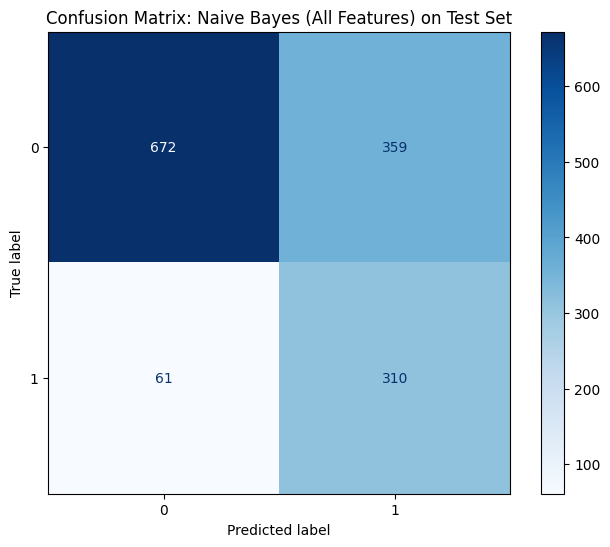

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Evaluating: KNN (All Features)...
Classification Report for KNN (All Features) on Test Set:



,precision,recall,f1-score,support
0,0.831941,0.869059,0.850095,1031.000000
1,0.584615,0.512129,0.545977,371.000000
accuracy,0.774608,0.774608,0.774608,0.774608
macro avg,0.708278,0.690594,0.698036,1402.000000
weighted avg,0.766493,0.774608,0.769619,1402.000000


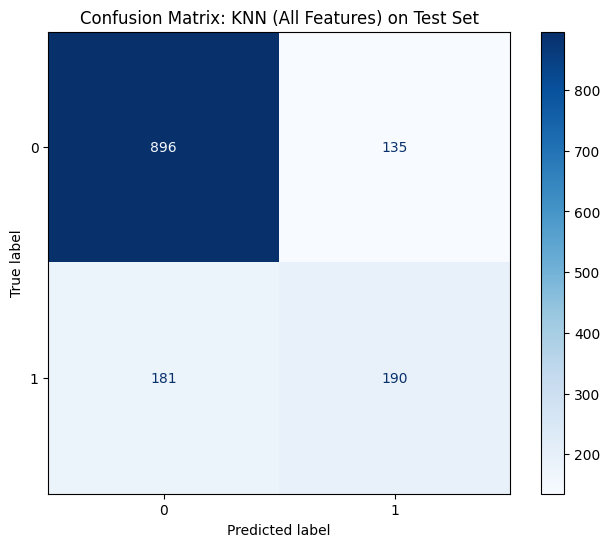

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Evaluating: Logistic Regression (All Features)...
Classification Report for Logistic Regression (All Features) on Test Set:



,precision,recall,f1-score,support
0,0.845875,0.904947,0.874414,1031.000000
1,0.672241,0.541779,0.600000,371.000000
accuracy,0.808845,0.808845,0.808845,0.808845
macro avg,0.759058,0.723363,0.737207,1402.000000
weighted avg,0.799927,0.808845,0.801798,1402.000000


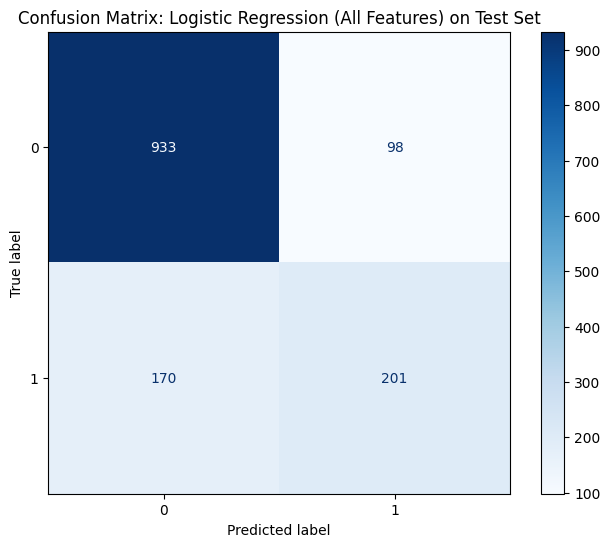

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Evaluating: Random Forest (All Features)...
Classification Report for Random Forest (All Features) on Test Set:



,precision,recall,f1-score,support
0,0.832587,0.902037,0.865922,1031.000000
1,0.645614,0.495957,0.560976,371.000000
accuracy,0.794579,0.794579,0.794579,0.794579
macro avg,0.739101,0.698997,0.713449,1402.000000
weighted avg,0.783110,0.794579,0.785226,1402.000000


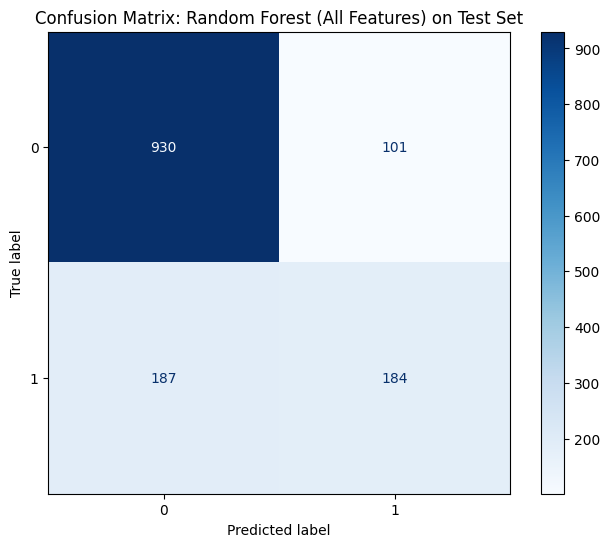

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Complete: All models have been evaluated.


In [ ]:
test_results_ori = {}
print("Evaluating models on unseen Test Set\n")

for model_name, trained_model in best_estimators_ori.items():
    print(f"Evaluating: {model_name}...")

    y_pred_test = trained_model.predict(X_test_ori)
    report_dict = classification_report(y_test_ori_encoded, y_pred_test, output_dict=True)

    print(f"Classification Report for {model_name} on Test Set:\n")
    report_df = pd.DataFrame(report_dict).T
    display(report_df)
    print("\n")

    fig, ax = plt.subplots(figsize=(8, 6))
    ConfusionMatrixDisplay.from_estimator(
        trained_model,
        X_test_ori,
        y_test_ori_encoded,
        ax=ax,
        cmap="Blues"
    )
    ax.set_title(f"Confusion Matrix: {model_name} on Test Set")
    plt.show()

    test_results_ori[model_name] = {
        "Test Accuracy": report_dict["accuracy"],
        "Test Precision (Positive Class)": report_dict.get("1", {}).get("precision", 0),
        "Test Recall (Positive Class)": report_dict.get("1", {}).get("recall", 0),
        "Test F1-Score (Positive Class)": report_dict.get("1", {}).get("f1-score", 0)
    }
    print("-" * 200 + "\n")

print("Complete: All models have been evaluated.")

#### **Part 2: For selected feature data**

Evaluating models on unseen Test Set

Evaluating: Naive Bayes (Selected Features)...
Classification Report for Naive Bayes (Selected Features) on Test Set:



,precision,recall,f1-score,support
0,0.912987,0.681862,0.780677,1031.00000
1,0.481013,0.819407,0.606181,371.00000
accuracy,0.718260,0.718260,0.718260,0.71826
macro avg,0.697000,0.750635,0.693429,1402.00000
weighted avg,0.798677,0.718260,0.734502,1402.00000


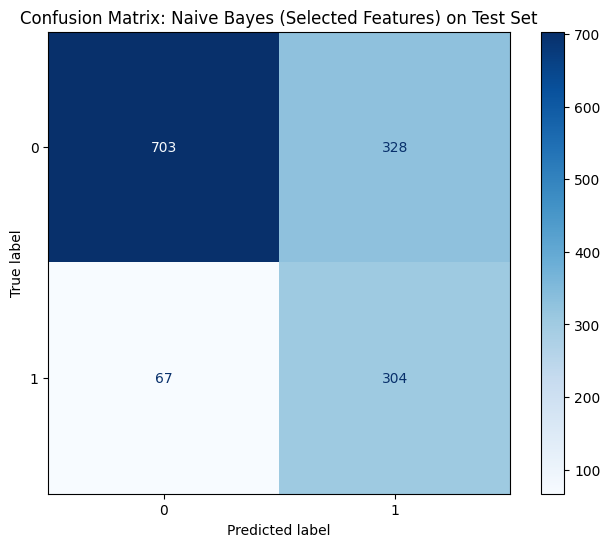

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Evaluating: KNN (Selected Features)...
Classification Report for KNN (Selected Features) on Test Set:



,precision,recall,f1-score,support
0,0.824742,0.853540,0.838894,1031.000000
1,0.549254,0.495957,0.521246,371.000000
accuracy,0.758916,0.758916,0.758916,0.758916
macro avg,0.686998,0.674749,0.680070,1402.000000
weighted avg,0.751842,0.758916,0.754838,1402.000000


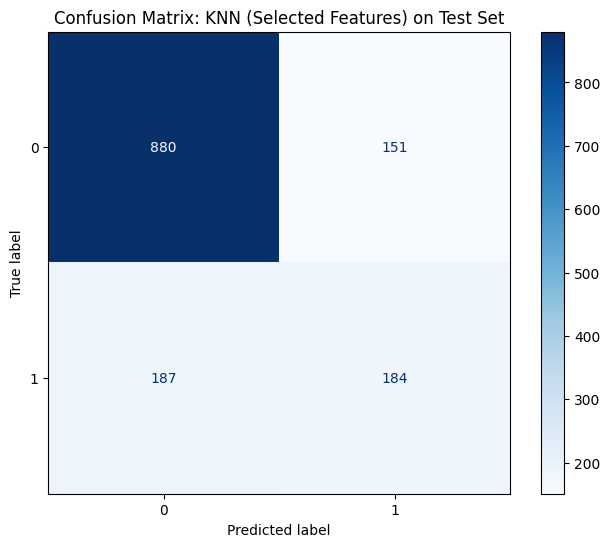

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Evaluating: Logistic Regression (Selected Features)...
Classification Report for Logistic Regression (Selected Features) on Test Set:



,precision,recall,f1-score,support
0,0.845109,0.904947,0.874005,1031.000000
1,0.671141,0.539084,0.597907,371.000000
accuracy,0.808131,0.808131,0.808131,0.808131
macro avg,0.758125,0.722015,0.735956,1402.000000
weighted avg,0.799073,0.808131,0.800943,1402.000000


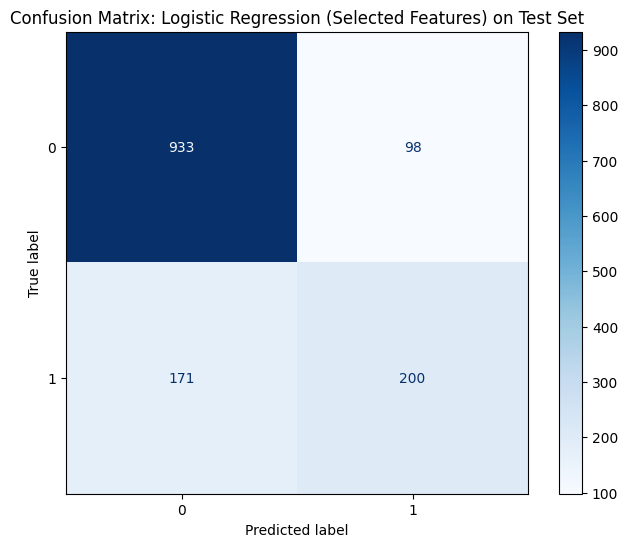

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Evaluating: Random Forest (Selected Features)...
Classification Report for Random Forest (Selected Features) on Test Set:



,precision,recall,f1-score,support
0,0.832587,0.902037,0.865922,1031.000000
1,0.645614,0.495957,0.560976,371.000000
accuracy,0.794579,0.794579,0.794579,0.794579
macro avg,0.739101,0.698997,0.713449,1402.000000
weighted avg,0.783110,0.794579,0.785226,1402.000000


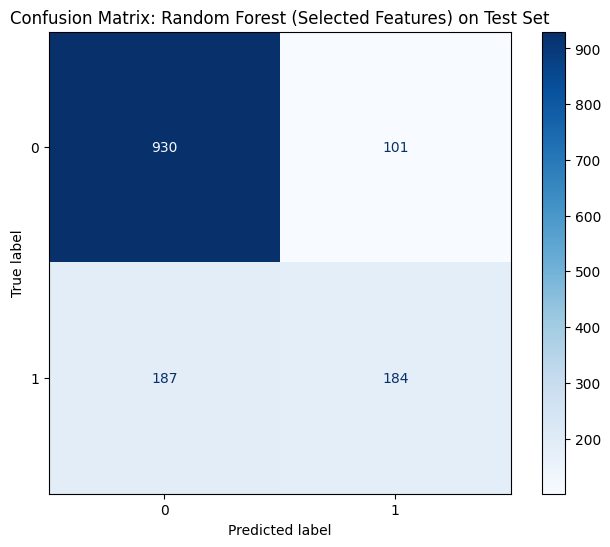

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Complete: All models have been evaluated.


In [ ]:
test_results_sel = {}
print("Evaluating models on unseen Test Set\n")

for model_name, trained_model in best_estimators_sel.items():
    print(f"Evaluating: {model_name}...")

    y_pred_test = trained_model.predict(X_test_sel)
    report_dict = classification_report(y_test_sel_encoded, y_pred_test, output_dict=True)

    print(f"Classification Report for {model_name} on Test Set:\n")
    report_df = pd.DataFrame(report_dict).T
    display(report_df)
    print("\n")

    fig, ax = plt.subplots(figsize=(8, 6))
    ConfusionMatrixDisplay.from_estimator(
        trained_model,
        X_test_sel,
        y_test_sel_encoded,
        ax=ax,
        cmap="Blues"
    )
    ax.set_title(f"Confusion Matrix: {model_name} on Test Set")
    plt.show()

    test_results_sel[model_name] = {
        "Test Accuracy": report_dict["accuracy"],
        "Test Precision (Positive Class)": report_dict.get("1", {}).get("precision", 0),
        "Test Recall (Positive Class)": report_dict.get("1", {}).get("recall", 0),
        "Test F1-Score (Positive Class)": report_dict.get("1", {}).get("f1-score", 0)
    }
    print("-" * 200 + "\n")

print("Complete: All models have been evaluated.")

## **Summary**

เราให้ความสำคัญกับการทำนาย Customer Churn โดยเน้นความสามารถในการตรวจจับลูกค้าที่มีแนวโน้ม “ย้ายค่าย” ซึ่งเป็น Positive Class (1) เพราะการพลาดลูกค้ากลุ่มนี้ (False Negative) ส่งผลกระทบต่อธุรกิจอย่างมาก เช่น การสูญเสียโอกาสในการทำแคมเปญรักษาลูกค้า หรือการจัดการเชิงรุกด้านความสัมพันธ์ลูกค้า

ด้วยเหตุนี้ Recall จึงถูกเลือกเป็นตัวชี้วัดหลักในการประเมินคุณภาพของโมเดล โดย Recall วัดความสามารถของโมเดลในการตรวจจับ ลูกค้าที่จะย้ายค่ายทั้งหมดจากจำนวนลูกค้าที่เป็น Churn จริงทั้งหมด ดังนั้นโมเดลที่มีค่า Recall สูงกว่าจะถือว่ามีประสิทธิภาพตรงตามเป้าหมายของโครงการ

ซึ่งได้มีการทดสอบโมเดลทั้งหมด 4 โมเดล และ 2 กรณีของ Features คือ
- All Features
- Selected Features

Models
- Naive Bayes (GaussianNB)
- KNN (KNeighborsClassifier)
- Logistic Regression
- Random Forest Classifier

**สรุปผลการเทรนโมเดลด้วยตัวชี้วัด Recall (Positive Class = 1)**

จากตารางด้านล่างแสดงค่า Recall ของแต่ละโมเดล

| Model               | Features | Recall (Positive Class = 1) |
| ------------------- | -------- | --------------------------- |
| **Naive Bayes**     | All      | **0.8356 (สูงที่สุด)**      |
| Naive Bayes         | Selected Features | 0.8194                      |
| KNN                 | All      | 0.5121                      |
| KNN                 | Selected Features | 0.4960                      |
| Logistic Regression | All      | 0.5418                      |
| Logistic Regression | Selected Features | 0.5391                      |
| Random Forest       | All      | 0.4960                      |
| Random Forest       | Selected Features | 0.4960                    |


โดยโมเดลที่มีประสิทธิภาพดีที่สุดตามเป้าหมายโครงการคือ **Naive Bayes (All Features)** เนื่องจากสามารถให้ค่า Recall สูงที่สุด `Recall = 0.8356` แม้ว่าค่าชี้วัดอื่น เช่น Accuracy หรือ Precision อาจไม่สูงมาก แต่เป็นการแลกเปลี่ยนที่ยอมรับได้ เนื่องจากเป้าหมายหลักของโครงการคือ **ลดความเสี่ยงในการพลาด**ตรวจจับลูกค้าที่กำลังจะย้ายค่ายให้ได้มากที่สุด
